# Random Forests
## Plotting raw data
In order make understanding the HAPT data set easier the provided data is plotted.
There are multiple ways of displaying the raw data, that depend on the chosen display type and the scope of the data.
### Individual files
The first approach is to plot the measurements of both sensors of each experiment.
For this purpose the x, y and z-values of each sensor are plotted on their own.
The code block below creates a 2-dimensional chart, with the measurements on the x-axis, the values of each sensor on the y-axis and one plotted line for each of the spatial axes.

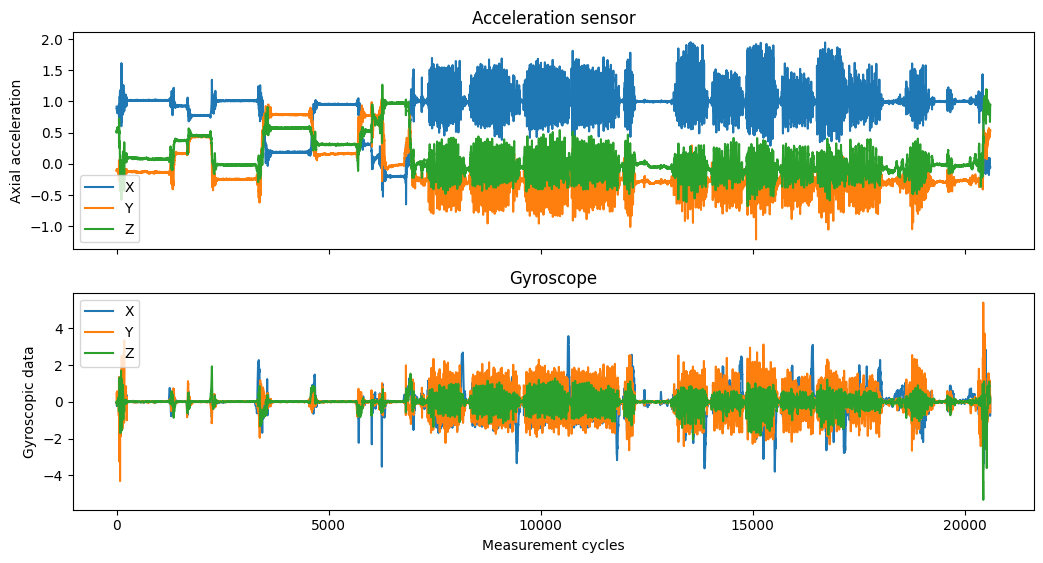

In [89]:
%matplotlib inline
# used modules
from matplotlib import pyplot as plt
import pandas as pd
import pathlib

# define function
def plotIndividualFile(expId):
    """This function creates a chart for the data recorded by the acceleration-sensor and the gyroscope during a given experiment"""
    rawDataFolder = pathlib.Path("HAPT Data Set/RawData") # get the folder holding the raw data files
    listColNames = ["X", "Y", "Z"] # the list used to name the columns in the data files
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
    fig.set_size_inches(12.4, 6.2)
    axs[0].sharex = True # share the x-axis between the charts
    axs[0].set_ylabel("Axial acceleration") # label the y-axis
    axs[0].set_title("Acceleration sensor") # label the chart
    accFile = pd.read_csv([file for file in rawDataFolder.glob(f'acc_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    accFile.plot(ax=axs[0], kind="line") # plot the acceleration data
    axs[1].sharex = True # share the x-axis between the charts
    axs[1].set_ylabel("Gyroscopic data") # label the y-axis
    axs[1].set_xlabel("Measurement cycles") # label the x-axis
    axs[1].set_title("Gyroscope") # label the chart
    gyrFile = pd.read_csv([file for file in rawDataFolder.glob(f'gyro_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the gyroscope file
    gyrFile.plot(ax=axs[1], kind="line") # plot the gyroscopic data
plotIndividualFile(1)

As an alternative to the 2-dimensional plot the code block below creates a 3-dimensional diagram, that holds the measured values of the sensors on their corresponding axis, while the measurement-steps are represented by the colour of the dots.

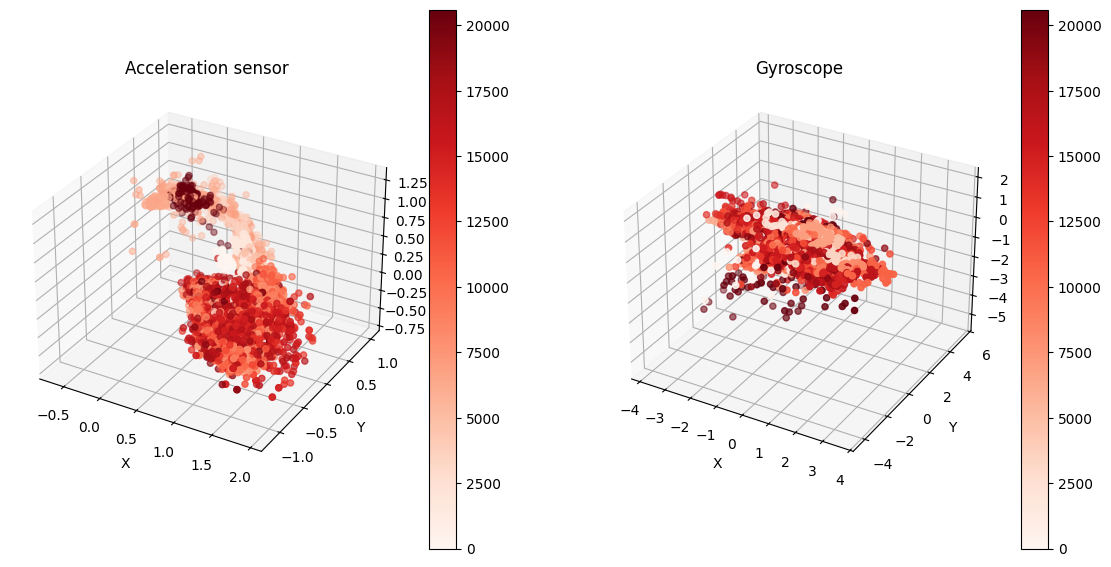

In [90]:
%matplotlib inline
# used modules
import numpy as np
import pandas as pd
import pathlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

# define functions
def plotIndividual3dFile(expId):
    rawDataFolder = pathlib.Path("HAPT Data Set/RawData") # get the RawData folder
    listColNames = ["X", "Y", "Z"] # the list used to name the columns in the data files
    fig = plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1,2,1,projection = "3d")
    ax1.set_title("Acceleration sensor") # label the chart
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")
    accFile = pd.read_csv([file for file in rawDataFolder.glob(f'acc_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    cycleNumbers = np.linspace(0, accFile.shape[0], accFile.shape[0])
    accPlot = ax1.scatter(accFile["X"], accFile["Y"], accFile["Z"], c=cycleNumbers, cmap="Reds")
    fig.colorbar(accPlot)
    ax2 = fig.add_subplot(1,2,2,projection = "3d")
    ax2.set_title("Gyroscope") # label the chart
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    gyrFile = pd.read_csv([file for file in rawDataFolder.glob(f'gyro_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    gyrPlot = ax2.scatter(gyrFile["X"], gyrFile["Y"], gyrFile["Z"], c=cycleNumbers, cmap="Reds")
    fig.colorbar(gyrPlot)
plotIndividual3dFile(1)

### Individual actions
While the approach above creates an overview of an entire experiment it does not provide a closer look of the data recorded during certain activities.
To plot individual activities the information in the labels.txt file in the folder RawData can be used.
This file shows the start and end-points of individual actions during the different experiments.
The following code block uses one line from this file to extract the data corresponding to one activity from the experiment files.
The code blocks below create a 2-dimensional and 3-dimensional plots following the same principal as the ones above.

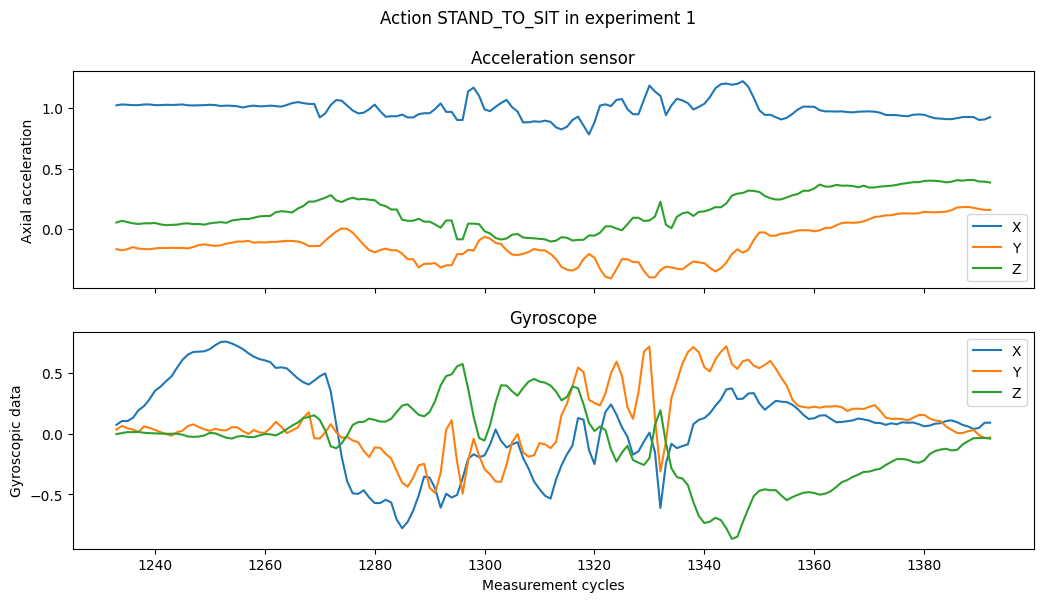

In [91]:
%matplotlib inline
# used modules
from matplotlib import pyplot as plt
import pandas as pd
import pathlib

# define function
def plotIndividualAction(labelRow):
    """This function creates a chart for the data recorded by the acceleration-sensor and the gyroscope during a given experiment"""
    haptFolder = pathlib.Path("HAPT Data Set") # get the datasets folder
    rawDataFolder = pathlib.Path("HAPT Data Set/RawData") # get the RawData folder
    listLabelColNames = ["expId", "userId", "actId", "start", "end"]
    listActionColNames = ["actId", "actName"]
    listColNames = ["X", "Y", "Z"] # the list used to name the columns in the data files
    labelFile = pd.read_csv([file for file in rawDataFolder.glob('labels.txt')][0], sep=" ", header=None, names=listLabelColNames)
    actionFile = pd.read_csv("HAPT Data Set/activity_labels.txt", sep=" ", header=None, names=listActionColNames)
    labelFile = labelFile.merge(actionFile, on="actId", how="left")
    expId = int(labelFile.iloc[labelRow]["expId"])
    startTime = labelFile.iloc[labelRow]["start"]
    endTime = labelFile.iloc[labelRow]["end"]
    action = labelFile.iloc[labelRow]["actName"]
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
    fig.set_size_inches(12.4, 6.2)
    axs[0].sharex = True # share the x-axis between the charts
    axs[0].set_ylabel("Axial acceleration") # label the y-axis
    axs[0].set_title("Acceleration sensor") # label the chart
    accFile = pd.read_csv([file for file in rawDataFolder.glob(f'acc_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    accFile = accFile.iloc[startTime:endTime + 1]
    accFile.plot(ax=axs[0], kind="line") # plot the acceleration data
    axs[1].sharex = True # share the x-axis between the charts
    axs[1].set_ylabel("Gyroscopic data") # label the y-axis
    axs[1].set_xlabel("Measurement cycles") # label the x-axis
    axs[1].set_title("Gyroscope") # label the chart
    gyrFile = pd.read_csv([file for file in rawDataFolder.glob(f'gyro_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    gyrFile = gyrFile.iloc[startTime:endTime + 1]
    gyrFile.plot(ax=axs[1], kind="line") # plot the gyroscopic data
    fig.suptitle(f'Action {action} in experiment {expId}')
plotIndividualAction(1)

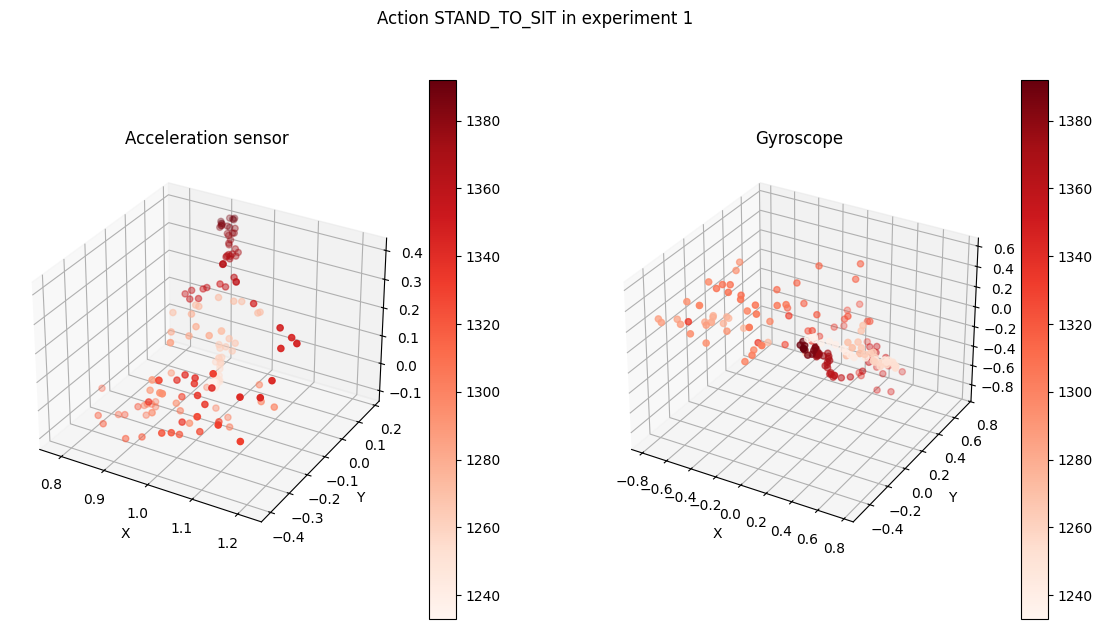

In [92]:
%matplotlib inline
# used modules
import numpy as np
import pandas as pd
import pathlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

# define functions
def plotIndividual3dAction(labelRow):
    haptFolder = pathlib.Path("HAPT Data Set") # get the datasets folder
    rawDataFolder = pathlib.Path("HAPT Data Set/RawData") # get the RawData folder
    listLabelColNames = ["expId", "userId", "actId", "start", "end"]
    listActionColNames = ["actId", "actName"]
    listColNames = ["X", "Y", "Z"] # the list used to name the columns in the data files
    labelFile = pd.read_csv([file for file in rawDataFolder.glob('labels.txt')][0], sep=" ", header=None, names=listLabelColNames)
    actionFile = pd.read_csv("HAPT Data Set/activity_labels.txt", sep=" ", header=None, names=listActionColNames)
    labelFile = labelFile.merge(actionFile, on="actId", how="left")
    expId = labelFile.iloc[labelRow]["expId"]
    startTime = labelFile.iloc[labelRow]["start"]
    endTime = labelFile.iloc[labelRow]["end"]
    action = labelFile.iloc[labelRow]["actName"]
    cycleNumbers = np.linspace(startTime, endTime, (endTime- startTime) + 1)
    fig = plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1,2,1,projection = "3d")
    ax1.set_title("Acceleration sensor") # label the chart
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")
    accFile = pd.read_csv([file for file in rawDataFolder.glob(f'acc_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    accFile = accFile.iloc[startTime:endTime + 1]
    accPlot = ax1.scatter(accFile["X"], accFile["Y"], accFile["Z"], c=cycleNumbers, cmap="Reds")
    fig.colorbar(accPlot)
    ax2 = fig.add_subplot(1,2,2,projection = "3d")
    ax2.set_title("Gyroscope") # label the chart
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    gyrFile = pd.read_csv([file for file in rawDataFolder.glob(f'gyro_exp{expId:02d}_user*.txt')][0], sep=" ", header=None, names=listColNames) # load the acceleration file
    gyrFile = gyrFile.iloc[startTime:endTime + 1]
    gyrPlot = ax2.scatter(gyrFile["X"], gyrFile["Y"], gyrFile["Z"], c=cycleNumbers, cmap="Reds")
    fig.colorbar(gyrPlot)
    fig.suptitle(f'Action {action} in experiment {expId}')
plotIndividual3dAction(1)

## Pre-Processing
Before the random forest algorithm can be utilized a number of features have to be extracted from the raw data.
During the preprocessing step the raw data is first grouped and segmented before calculating the feature-values.
### Grouping the raw data
Before beginning with the feature extraction step of the preprocessing process the raw data is first grouped by their experiment-id.
This is achieved by gathering the sensor data of both sensors and the activity labels belonging to one experiment in a single data frame.

In [93]:
# used modules
import numpy as np
import pandas as pd
import pathlib

# define function
def makeExperimentDataFrame(expID):
    haptFolder = pathlib.Path("HAPT Data Set") # get the datasets folder
    rawDataFolder = pathlib.Path("HAPT Data Set/RawData") # get the RawData folder
    listLabelColNames = ["expId", "userId", "actId", "start", "end"]
    listActionColNames = ["actId", "actName"]
    labelFile = pd.read_csv([file for file in rawDataFolder.glob('labels.txt')][0], sep=" ", header=None, names=listLabelColNames)
    actionFile = pd.read_csv("HAPT Data Set/activity_labels.txt", sep=" ", header=None, names=listActionColNames)
    labelFile = labelFile.merge(actionFile, on="actId", how="left")
    labelFile = labelFile[labelFile["expId"] == expID]
    accFile = pd.read_csv([file for file in rawDataFolder.glob(f'acc_exp{expID:02d}_user*.txt')][0], sep=" ", header=None, names=["x-acc","y-acc","z-acc"]) # load the acceleration file
    gyrFile = pd.read_csv([file for file in rawDataFolder.glob(f'gyro_exp{expID:02d}_user*.txt')][0], sep=" ", header=None, names=["x-gyr","y-gyr","z-gyr"]) # load the gyroscopes file
    expFile = accFile.join(gyrFile)
    expFile["action"] = ""
    for i in range(len(labelFile)):
        start = labelFile.iloc[i]["start"]
        end = labelFile.iloc[i]["end"]
        action = labelFile.iloc[i]["actName"]
        actId = labelFile.iloc[i]["actId"]
        expFile.loc[np.r_[start:end + 1],"action"] = pd.Series([action for j in range(start, end + 1)], index=np.r_[start:end + 1])
        expFile.loc[np.r_[start:end + 1],"actId"] = pd.Series([actId for j in range(start, end + 1)], index=np.r_[start:end + 1])
    return expFile
makeExperimentDataFrame(1)

,x-acc,y-acc,z-acc,x-gyr,y-gyr,z-gyr,action,actId
0,0.918056,-0.112500,0.509722,-0.054978,-0.069639,-0.030849,,NaN
1,0.911111,-0.093056,0.537500,-0.012523,0.019242,-0.038485,,NaN
2,0.881944,-0.086111,0.513889,-0.023518,0.276417,0.006414,,NaN
3,0.881944,-0.086111,0.513889,-0.093462,0.367741,0.001222,,NaN
4,0.879167,-0.100000,0.505556,-0.124311,0.476780,-0.022907,,NaN
...,...,...,...,...,...,...,...,...
20593,-0.069444,0.531944,0.806944,-0.648128,-0.118813,0.021380,,NaN
20594,-0.061111,0.519444,0.919444,-0.761444,-0.466396,0.082467,,NaN
20595,-0.051389,0.516667,0.956944,-0.670425,-0.584293,0.086743,,NaN
20596,-0.061111,0.525000,0.956944,-0.284663,-0.180205,0.135612,,NaN


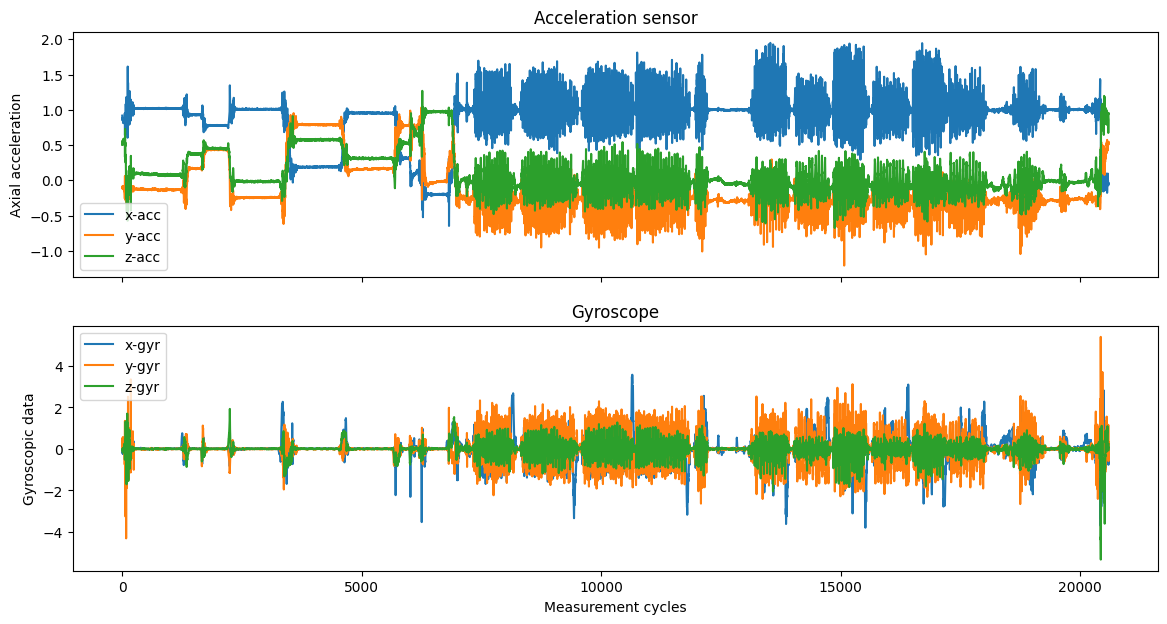

In [94]:
def makeExperimentDFGraph(dfExperiment):
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
    fig.set_size_inches(14, 7)
    axs[0].sharex = True
    axs[0].set_ylabel("Axial acceleration")
    axs[0].set_title("Acceleration sensor")
    dfExperiment.iloc[:,0:3].plot(ax=axs[0], kind="line")
    axs[1].sharex = True
    axs[1].set_ylabel("Gyroscopic data")
    axs[1].set_title("Gyroscope")
    dfExperiment.iloc[:,3:6].plot(ax=axs[1], kind="line")
    axs[1].set_xlabel("Measurement cycles")
makeExperimentDFGraph(makeExperimentDataFrame(1))

### Segmentation
After the data of each experiment is gathered into a separate data frame a segmentation algorithm can now be used to create data sets that will be used to extract features.
The following function implements a sliding window algorithm, that splits the data frame into multiple parts of approximately the same length:

In [95]:
# used modules
import pandas as pd

# define function
def slidingWindow(eDF, length, overlap):
    listWindows = []
    curStart = 0
    curEnd = length
    while curEnd < len(eDF):
        listWindows.append(eDF.iloc[curStart:curEnd])
        curStart = curEnd - int(length / 100) * overlap
        curEnd = curStart + length
    if curStart < len(eDF):
        listWindows.append(eDF.iloc[curStart:])
    return listWindows
firstSlidingWindows = slidingWindow(makeExperimentDataFrame(1), 250, 25)

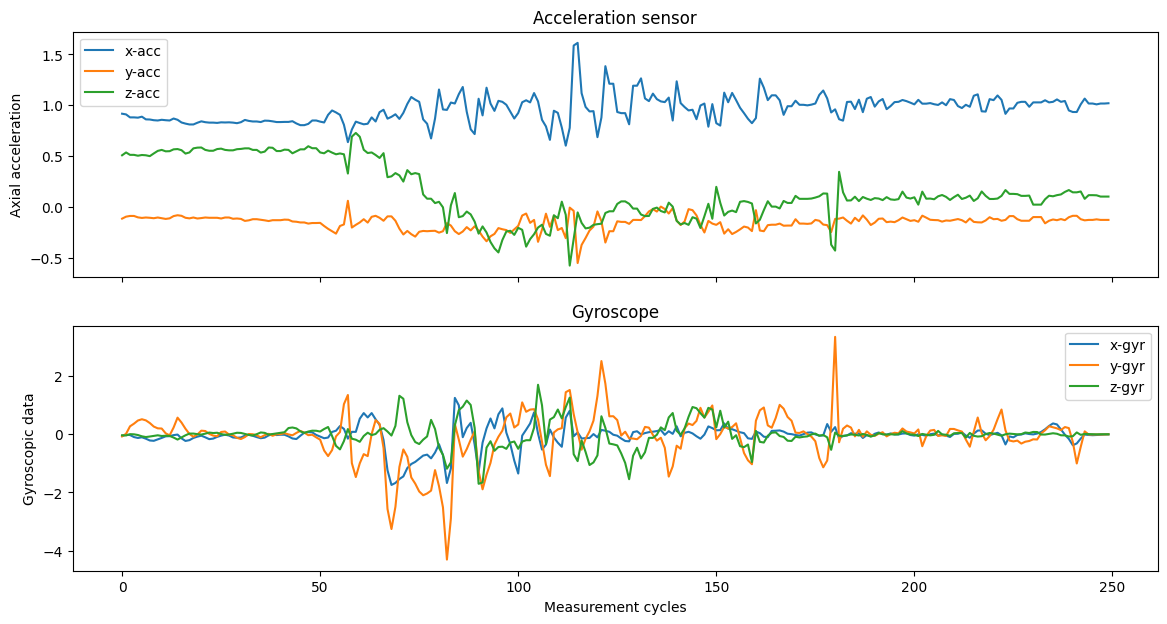

In [96]:
makeExperimentDFGraph(firstSlidingWindows[0])

### Fast-Fourier transformation
Then a fast fourier transformation is applied to each window to transform the data from a time series into a frequency format.
The following code block consists of a function, that receives a data frame containing a time series and transforms it into a data frame with the corresponding frequency values.
In addition, there is a function, that takes a list of sliding window data frames and transforms them, using the first function, into frequency data frames.

In [97]:
# used modules
import numpy as np
import pandas as pd

# define function
def fftWindow(dfWindow):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    dfFFT = pd.DataFrame()
    for col in listSensorColumns:
        dfFFT[col] = np.abs(np.fft.fft(dfWindow[col]))
    return dfFFT

# define iterating function
def fftWindows(listWindows):
    listFftDf = []
    for window in listWindows:
        listFftDf.append(fftWindow(window))
    return listFftDf
fftWindows(firstSlidingWindows)

[          x-acc      y-acc      z-acc      x-gyr      y-gyr      z-gyr
 0    240.237509  37.300001  38.161113  14.340061  20.154582   2.470034
 1     10.784356   5.076837  38.212882  15.976170  44.374200   2.770216
 2      6.088071   2.973713  24.359541  11.734912  47.825093   5.666529
 3      1.765433   2.322041   6.688867  11.186643  41.167906   8.514006
 4      1.101994   2.248786   8.430001  15.355886  36.233058   7.577032
 ..          ...        ...        ...        ...        ...        ...
 245    2.888605   1.074475   7.197235  14.496456  30.573321  11.566521
 246    1.101994   2.248786   8.430001  15.355886  36.233058   7.577032
 247    1.765433   2.322041   6.688867  11.186643  41.167906   8.514006
 248    6.088071   2.973713  24.359541  11.734912  47.825093   5.666529
 249   10.784356   5.076837  38.212882  15.976170  44.374200   2.770216
 
 [250 rows x 6 columns],
           x-acc      y-acc      z-acc     x-gyr     y-gyr     z-gyr
 0    254.704180  30.738890  24.825001  

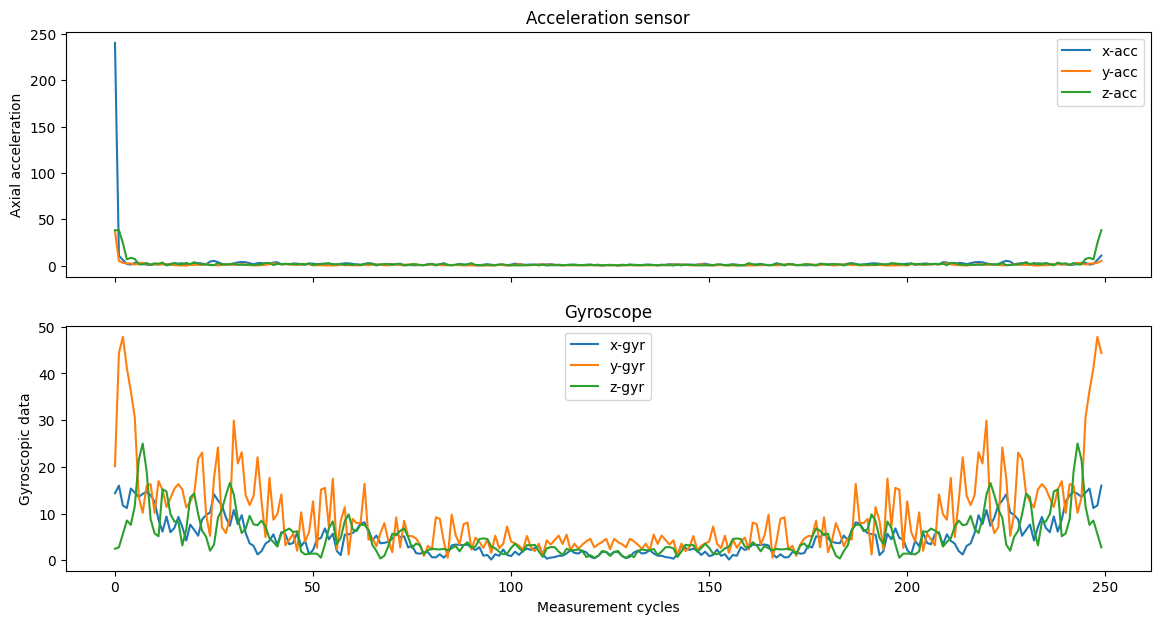

In [98]:
makeExperimentDFGraph(fftWindows(firstSlidingWindows)[0])

### Determine the activity of each window
In order to determine the activity assigned to a window the number of samples, which belong to each activity of the window is counted.
From these activities the one with the highest amount of samples is selected as the activity for this window.
The following code block calculates the activity IDs for each data frame in a list of sliding windows.

In [99]:
# used modules
import numpy as np
import pandas as pd

def getWindowActivity(dfWindow):
    dictActivities = {}
    for val in dfWindow["actId"]:
        """if np.isnan(val):
            dictActivities[0] = dictActivities.get(0, 0) + 1
        else:
            dictActivities[int(val)] = dictActivities.get(int(val), 0) + 1"""
        if not np.isnan(val):
            dictActivities[int(val)] = dictActivities.get(int(val), 0) + 1
    if len(dictActivities) != 0:
        return max(dictActivities, key=dictActivities.get)
    return 0

# define function
def buildActivityList(listWindows):
    listActivities = []
    for dfWindow in listWindows:
        listActivities.append(getWindowActivity(dfWindow))
    return listActivities
buildActivityList(firstSlidingWindows)

[0,
 5,
 5,
 5,
 5,
 5,
 7,
 4,
 4,
 4,
 4,
 8,
 5,
 5,
 5,
 5,
 5,
 11,
 6,
 6,
 6,
 6,
 6,
 10,
 4,
 4,
 4,
 4,
 9,
 6,
 6,
 6,
 6,
 6,
 12,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### Feature extraction
After the windows have been created the feature extractions can be executed.
These consist of a number of calculations, that summarize each windows columns with a single value.
#### Mean measured data
The following code block contains a function, that takes the data frame of a sliding window with the raw sensor data 
and returns the mean value of the columns.

In [100]:
# used modules
import pandas as pd

# define averaging function
def getMeanDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_mean","ya_mean","za_mean","xg_mean","yg_mean","zg_mean"]
    if isFFT:
        colNames = ["fft_xa_mean","fft_ya_mean","fft_za_mean","fft_xg_mean","fft_yg_mean","fft_zg_mean"]
    dfMean = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        listMean = []
        for col in listSensorColumns:
            listMean.append(dfWindow[col].mean())
        dfMean.loc[len(dfMean)] = listMean
    return dfMean
getMeanDf(firstSlidingWindows)

,xa_mean,ya_mean,za_mean,xg_mean,yg_mean,zg_mean
0,0.960950,-0.149200,0.152644,-0.057360,-0.080618,-0.009880
1,1.018817,-0.122956,0.099300,0.008324,-0.003013,0.003269
2,1.020217,-0.127844,0.088428,0.000969,-0.002395,0.002109
3,1.020483,-0.131322,0.081683,0.003742,-0.001955,0.003787
4,1.021028,-0.134000,0.075561,0.005767,-0.000264,0.001811
...,...,...,...,...,...,...
98,1.001794,-0.275333,-0.028661,0.167048,-0.069823,-0.009398
99,1.005172,-0.264711,-0.029428,0.021808,-0.001706,-0.002021
100,1.004156,-0.260406,0.002494,0.277622,-0.046202,-0.001129
101,0.962689,-0.212611,0.058594,-0.192963,0.160443,-0.268698


#### Median of the measured data
The following code block contains a function used to calculate the median of the raw data values for each column in a sliding windows data frame.

In [101]:
# used modules
import pandas as pd

# define averaging function
def getMedianDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_median","ya_median","za_median","xg_median","yg_median","zg_median"]
    if isFFT:
        colNames = ["fft_xa_median","fft_ya_median","fft_za_median","fft_xg_median","fft_yg_median","fft_zg_median"]
    dfMedian = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        listMedian = []
        for col in listSensorColumns:
            listMedian.append(dfWindow[col].median())
        dfMedian.loc[len(dfMedian)] = listMedian
    return dfMedian
getMedianDf(firstSlidingWindows)

,xa_median,ya_median,za_median,xg_median,yg_median,zg_median
0,0.961806,-0.133333,0.090972,-0.014661,0.012065,-0.005803
1,1.019445,-0.124306,0.098611,0.009621,-0.003512,0.002902
2,1.020833,-0.127778,0.087500,-0.002596,-0.002749,0.001374
3,1.020833,-0.130556,0.081944,0.003512,-0.000305,0.003054
4,1.020833,-0.134722,0.075000,0.003971,-0.000305,0.002749
...,...,...,...,...,...,...
98,1.002778,-0.275000,-0.036806,0.044440,-0.018631,0.009163
99,1.005556,-0.265278,-0.030556,0.020006,-0.003818,0.000458
100,1.004167,-0.263889,-0.018056,0.290161,-0.010843,0.007178
101,1.002778,-0.265278,0.011111,0.003665,0.014203,-0.008094


#### Calculate standard deviations
The code block below is used to calculate the standard deviation of each column in a given sliding windows data frame.

In [102]:
# used modules
import pandas as pd

# define averaging function
def getStdDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_std","ya_std","za_std","xg_std","yg_std","zg_std"]
    if isFFT:
        colNames = ["fft_xa_std","fft_ya_std","fft_za_std","fft_xg_std","fft_yg_std","fft_zg_std"]
    dfStd = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        listStd = []
        for col in listSensorColumns:
            listStd.append(dfWindow[col].std())
        dfStd.loc[len(dfStd)] = listStd
    return dfStd
getStdDf(firstSlidingWindows)

,xa_std,ya_std,za_std,xg_std,yg_std,zg_std
0,0.131524,0.070082,0.281574,0.392757,0.808910,0.435519
1,0.018920,0.009367,0.016517,0.062288,0.127194,0.021342
2,0.003076,0.006206,0.007534,0.015048,0.008995,0.010641
3,0.002824,0.008317,0.007928,0.013198,0.010272,0.011548
4,0.003181,0.006290,0.006291,0.012586,0.010510,0.009744
...,...,...,...,...,...,...
98,0.053680,0.065183,0.068402,0.299770,0.198674,0.130755
99,0.003905,0.009596,0.007501,0.066652,0.017009,0.023817
100,0.016689,0.035407,0.056093,0.197153,0.151718,0.054571
101,0.185482,0.176064,0.202400,0.810357,0.894202,1.041599


#### Variance
The code block below computes the variance of all columns in the provided sliding windows data frame.

In [103]:
# used modules
import pandas as pd

# define averaging function
def getVarDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_var","ya_var","za_var","xg_var","yg_var","zg_var"]
    if isFFT:
        colNames = ["fft_xa_var","fft_ya_var","fft_za_var","fft_xg_var","fft_yg_var","fft_zg_var"]
    dfVar = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        listVar = []
        for col in listSensorColumns:
            listVar.append(dfWindow[col].var())
        dfVar.loc[len(dfVar)] = listVar
    return dfVar
getVarDf(firstSlidingWindows)

,xa_var,ya_var,za_var,xg_var,yg_var,zg_var
0,0.017299,0.004912,0.079284,0.154258,0.654336,0.189677
1,0.000358,0.000088,0.000273,0.003880,0.016178,0.000455
2,0.000009,0.000039,0.000057,0.000226,0.000081,0.000113
3,0.000008,0.000069,0.000063,0.000174,0.000106,0.000133
4,0.000010,0.000040,0.000040,0.000158,0.000110,0.000095
...,...,...,...,...,...,...
98,0.002882,0.004249,0.004679,0.089862,0.039471,0.017097
99,0.000015,0.000092,0.000056,0.004443,0.000289,0.000567
100,0.000279,0.001254,0.003146,0.038869,0.023018,0.002978
101,0.034404,0.030999,0.040966,0.656679,0.799598,1.084930


#### Covariance
The following code block receives the data frame of a sliding window and computes the covariance matrix of the x, y and z-axis values of both sensors and then saves each individual covariance as a separate feature.

In [104]:
# used modules
import pandas as pd

# define averaging function
def covWindow(rawDataFrame):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    dfCov = rawDataFrame[listSensorColumns].cov()
    listCov = []
    for i in range(len(listSensorColumns)):
        for j in range(i, len(listSensorColumns)):
            listCov.append(dfCov.iloc[i].iloc[j])
    return listCov

# define iterating function
def covWindows(dataFrameList):
    listWindowCov = []
    for rawDataFrame in dataFrameList:
        listWindowCov.append(covWindow(rawDataFrame))
    return listWindowCov
covWindows(firstSlidingWindows)

def getCovDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_xa_cov","xa_ya_cov","xa_za_cov","xa_xg_cov","xa_yg_cov","xa_zg_cov",
                "ya_ya_cov","ya_za_cov","ya_xg_cov","ya_yg_cov","ya_zg_cov",
                "za_za_cov","za_xg_cov","za_yg_cov","za_zg_cov",
                "xg_xg_cov","xg_yg_cov","xg_zg_cov",
                "yg_yg_cov","yg_zg_cov",
                "zg_zg_cov"]
    if isFFT:
        colNames = ["fft_xa_xa_cov","fft_xa_ya_cov","fft_xa_za_cov","fft_xa_xg_cov","fft_xa_yg_cov","fft_xa_zg_cov",
                    "fft_ya_ya_cov","fft_ya_za_cov","fft_ya_xg_cov","fft_ya_yg_cov","fft_ya_zg_cov",
                    "fft_za_za_cov","fft_za_xg_cov","fft_za_yg_cov","fft_za_zg_cov",
                    "fft_xg_xg_cov","fft_xg_yg_cov","fft_xg_zg_cov",
                    "fft_yg_yg_cov","fft_yg_zg_cov",
                    "fft_zg_zg_cov"]
    dfCov = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        dfCovMat = dfWindow[listSensorColumns].cov()
        listCov = []
        for i in range(len(listSensorColumns)):
            for j in range(i, len(listSensorColumns)):
                listCov.append(dfCovMat.iloc[i].iloc[j])
        dfCov.loc[len(dfCov)] = listCov
    return dfCov
getCovDf(firstSlidingWindows)

,xa_xa_cov,xa_ya_cov,xa_za_cov,xa_xg_cov,xa_yg_cov,xa_zg_cov,ya_ya_cov,ya_za_cov,ya_xg_cov,ya_yg_cov,...,za_za_cov,za_xg_cov,za_yg_cov,za_zg_cov,xg_xg_cov,xg_yg_cov,xg_zg_cov,yg_yg_cov,yg_zg_cov,zg_zg_cov
0,0.017299,-0.002439,-0.017146,6.155566e-03,0.007127,-0.012068,0.004912,0.004623,0.002397,0.010126,...,0.079284,-0.009050,-0.025815,0.007577,0.154258,0.174548,0.022011,0.654336,0.069537,0.189677
1,0.000358,-0.000053,-0.000158,5.995434e-04,0.001227,-0.000035,0.000088,0.000022,-0.000193,-0.000470,...,0.000273,-0.000309,-0.000408,-0.000037,0.003880,0.003466,0.000076,0.016178,-0.000972,0.000455
2,0.000009,-0.000002,-0.000002,8.366568e-07,0.000005,-0.000003,0.000039,0.000020,0.000031,-0.000002,...,0.000057,0.000024,-0.000016,0.000017,0.000226,-0.000024,0.000055,0.000081,-0.000053,0.000113
3,0.000008,-0.000001,-0.000002,5.075010e-06,0.000002,0.000003,0.000069,0.000040,-0.000012,0.000005,...,0.000063,-0.000004,-0.000008,0.000008,0.000174,-0.000010,0.000059,0.000106,-0.000077,0.000133
4,0.000010,-0.000002,-0.000004,4.605351e-06,0.000002,-0.000005,0.000040,0.000010,-0.000014,0.000007,...,0.000040,-0.000014,-0.000009,0.000017,0.000158,-0.000033,0.000011,0.000110,-0.000046,0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.002882,0.000562,0.000195,-1.205431e-03,0.001427,0.000490,0.004249,0.001303,-0.003030,-0.000875,...,0.004679,-0.005184,0.000537,0.000897,0.089862,-0.009728,-0.013104,0.039471,-0.000153,0.017097
99,0.000015,0.000011,0.000001,-1.403820e-07,0.000015,0.000003,0.000092,0.000033,0.000024,-0.000008,...,0.000056,-0.000025,-0.000007,0.000022,0.004443,-0.000568,0.000411,0.000289,-0.000219,0.000567
100,0.000279,0.000170,-0.000152,-9.574067e-05,0.000796,-0.000204,0.001254,0.000532,-0.001674,0.002056,...,0.003146,0.001598,-0.000580,0.000818,0.038869,-0.015388,-0.001710,0.023018,-0.001444,0.002978
101,0.034404,-0.027503,-0.031018,7.539130e-02,-0.041300,0.056263,0.030999,0.029142,-0.095708,0.084320,...,0.040966,-0.073271,0.052646,-0.057410,0.656679,-0.387532,0.700762,0.799598,-0.609866,1.084930


#### Maximum
The code block below computes the highest value of each column in a given data frame.

In [105]:
# used modules
import pandas as pd

# define averaging function
def getMaxDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_max","ya_max","za_max","xg_max","yg_max","zg_max"]
    if isFFT:
        colNames = ["fft_xa_max","fft_ya_max","fft_za_max","fft_xg_max","fft_yg_max","fft_zg_max"]
    dfMax = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        listMax = []
        for col in listSensorColumns:
            listMax.append(dfWindow[col].max())
        dfMax.loc[len(dfMax)] = listMax
    return dfMax
getMaxDf(firstSlidingWindows)

,xa_max,ya_max,za_max,xg_max,yg_max,zg_max
0,1.613889,0.062500,0.729167,1.254717,3.353956,1.705841
1,1.108333,-0.083333,0.168056,0.375682,0.854295,0.118508
2,1.029167,-0.108333,0.109722,0.053451,0.025962,0.036346
3,1.027778,-0.111111,0.104167,0.053451,0.025962,0.033598
4,1.029167,-0.113889,0.094444,0.048564,0.047342,0.032987
...,...,...,...,...,...,...
98,1.227778,-0.084722,0.223611,0.881784,0.582155,0.254731
99,1.016667,-0.240278,-0.005556,0.147524,0.057116,0.053756
100,1.069445,-0.166667,0.156944,0.732427,0.282525,0.136223
101,1.433333,0.543056,0.969444,0.783435,5.402798,0.976163


#### Minimum
The following code block computes the minimal value for each column in a given data frame.

In [106]:
# used modules
import pandas as pd

# define averaging function
def getMinDf(listWindows, isFFT = False):
    listSensorColumns = ["x-acc","y-acc","z-acc","x-gyr","y-gyr","z-gyr"]
    colNames = ["xa_min","ya_min","za_min","xg_min","yg_min","zg_min"]
    if isFFT:
        colNames = ["fft_xa_min","fft_ya_min","fft_za_min","fft_xg_min","fft_yg_min","fft_zg_min"]
    dfMin = pd.DataFrame(columns=colNames)
    for dfWindow in listWindows:
        listMin = []
        for col in listSensorColumns:
            listMin.append(dfWindow[col].min())
        dfMin.loc[len(dfMin)] = listMin
    return dfMin
getMinDf(firstSlidingWindows)

,xa_min,ya_min,za_min,xg_min,yg_min,zg_min
0,0.604167,-0.548611,-0.573611,-1.740355,-4.308127,-1.700649
1,0.916667,-0.158333,0.025000,-0.373239,-1.002124,-0.111788
2,1.009722,-0.141667,0.070833,-0.030543,-0.034514,-0.024435
3,1.012500,-0.154167,0.063889,-0.026573,-0.033903,-0.024435
4,1.009722,-0.152778,0.058333,-0.025962,-0.037874,-0.041233
...,...,...,...,...,...,...
98,0.827778,-0.450000,-0.156944,-0.524122,-0.664011,-0.728457
99,0.993056,-0.284722,-0.048611,-0.105680,-0.036957,-0.061697
100,0.956944,-0.341667,-0.086111,-0.262367,-0.624304,-0.159436
101,0.122222,-0.409722,-0.368056,-3.701538,-2.406504,-5.330716


### Create a feature data frame
The following code block is used to gather all features in a single data frame, so that each window is a single row of feature values.

In [107]:
# used modules
import pandas as pd

# define function
def createFeatureDf(listWindows):
    dfFeatures = getMeanDf(listWindows)
    dfFeatures = dfFeatures.join(getMedianDf(listWindows))
    dfFeatures = dfFeatures.join(getStdDf(listWindows))
    dfFeatures = dfFeatures.join(getVarDf(listWindows))
    dfFeatures = dfFeatures.join(getCovDf(listWindows))
    dfFeatures = dfFeatures.join(getMaxDf(listWindows))
    dfFeatures = dfFeatures.join(getMinDf(listWindows))
    listFftWindows = fftWindows(listWindows)
    dfFeatures = dfFeatures.join(getMeanDf(listFftWindows, True))
    dfFeatures = dfFeatures.join(getMedianDf(listFftWindows, True))
    dfFeatures = dfFeatures.join(getStdDf(listFftWindows, True))
    dfFeatures = dfFeatures.join(getVarDf(listFftWindows, True))
    dfFeatures = dfFeatures.join(getCovDf(listFftWindows, True))
    dfFeatures = dfFeatures.join(getMaxDf(listFftWindows, True))
    dfFeatures = dfFeatures.join(getMinDf(listFftWindows, True))
    return dfFeatures
createFeatureDf(firstSlidingWindows)

,xa_mean,ya_mean,za_mean,xg_mean,yg_mean,zg_mean,xa_median,ya_median,za_median,xg_median,...,fft_za_max,fft_xg_max,fft_yg_max,fft_zg_max,fft_xa_min,fft_ya_min,fft_za_min,fft_xg_min,fft_yg_min,fft_zg_min
0,0.960950,-0.149200,0.152644,-0.057360,-0.080618,-0.009880,0.961806,-0.133333,0.090972,-0.014661,...,38.212882,15.976170,47.825093,24.995014,0.057236,0.021337,0.097211,0.150755,0.550743,0.387050
1,1.018817,-0.122956,0.099300,0.008324,-0.003013,0.003269,1.019445,-0.124306,0.098611,0.009621,...,24.825001,3.024647,5.203154,0.817338,0.015818,0.021047,0.014442,0.049850,0.033712,0.028344
2,1.020217,-0.127844,0.088428,0.000969,-0.002395,0.002109,1.020833,-0.127778,0.087500,-0.002596,...,22.106945,0.969307,0.598648,0.713655,0.000621,0.002118,0.008854,0.003200,0.004629,0.008255
3,1.020483,-0.131322,0.081683,0.003742,-0.001955,0.003787,1.020833,-0.130556,0.081944,0.003512,...,20.420834,1.047245,0.748013,0.946841,0.003455,0.007149,0.006180,0.011464,0.005809,0.004019
4,1.021028,-0.134000,0.075561,0.005767,-0.000264,0.001811,1.020833,-0.134722,0.075000,0.003971,...,18.890278,1.441642,0.645949,0.592407,0.002524,0.004360,0.009722,0.004784,0.002945,0.008691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.001794,-0.275333,-0.028661,0.167048,-0.069823,-0.009398,1.002778,-0.275000,-0.036806,0.044440,...,7.165278,41.762108,17.455780,9.335434,0.013799,0.014178,0.035950,0.014765,0.008247,0.013220
99,1.005172,-0.264711,-0.029428,0.021808,-0.001706,-0.002021,1.005556,-0.265278,-0.030556,0.020006,...,7.356945,8.684833,1.625617,2.175922,0.001639,0.003613,0.001389,0.007287,0.009134,0.004316
100,1.004156,-0.260406,0.002494,0.277622,-0.046202,-0.001129,1.004167,-0.263889,-0.018056,0.290161,...,7.145406,69.405593,12.561550,4.748458,0.009142,0.007593,0.005870,0.042808,0.011694,0.012033
101,0.962689,-0.212611,0.058594,-0.192963,0.160443,-0.268698,1.002778,-0.265278,0.011111,0.003665,...,15.149988,65.060489,57.668889,70.057223,0.086368,0.063889,0.111409,0.210574,0.141711,0.100183


### Create data files
The code block below contains a function, that creates two csv files with the feature values.

In [108]:
# define the function
def createDataSet(listExpIds, intWindowSize, intOverlap, strName):
    listWindows = []
    listActivitys = []
    for expId in listExpIds:
        for window in slidingWindow(makeExperimentDataFrame(expId), intWindowSize, intOverlap):
            activity = getWindowActivity(window)
            if activity != 0:
                listWindows.append(window)
                listActivitys.append(activity)
    createFeatureDf(listWindows).to_csv("x_" + strName + ".csv", index=False)
    #pd.Series(buildActivityList(listWindows)).to_csv("y_" + strName + ".csv", header=["actId"], index=False)
    pd.Series(listActivitys).to_csv("y_" + strName + ".csv", header=["actId"], index=False)

## Implementing the random forest algorithm
After the features have been computed the data needs to be split into a training and test set.
Then a first run of the random forest algorithm can be executed

In [109]:
# used modules
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# determine the parameters of the windows
durWindow = 5 # duration of each window in seconds
lenWindow = durWindow * 50 # number of samples in each window
overlap = 25

rndSeed = np.random.seed(42)

# build the full data set
createDataSet([x for x in range(1, 62)], lenWindow, overlap, "full")

# split train and test data
#xTrain, xTest, yTrain, yTest = train_test_split(pd.read_csv("x_full.csv"), pd.read_csv("y_full.csv"), train_size=0.75, test_size=0.25, random_state=rndSeed)
xTrain, xTest, yTrain, yTest = train_test_split(
    pd.read_csv("x_full.csv"), pd.read_csv("y_full.csv"), 
    train_size=0.75, test_size=0.25, 
    random_state=np.random.seed(3)
)

# initialise the scaler
scaler = StandardScaler()
xTrainS = scaler.fit_transform(xTrain)
xTestS = scaler.transform(xTest)
yTrainR = yTrain.values.ravel()

# initialise the classifier
rfc = RandomForestClassifier(random_state=rndSeed)

# fit the rfc with the scaled training data
rfc.fit(xTrainS, yTrainR)

# use the scaled test data to make a prediction
yPre = rfc.predict(xTestS)

### Evaluating the prediction
After the random forest classifier completed its prediction the build in functions of sklearn are used to evaluate its performance.

In [110]:
print("Training score:", rfc.score(xTrainS, yTrain))
print("Test score:", rfc.score(xTestS, yTest))

Training score: 1.0
Test score: 0.9034188034188034


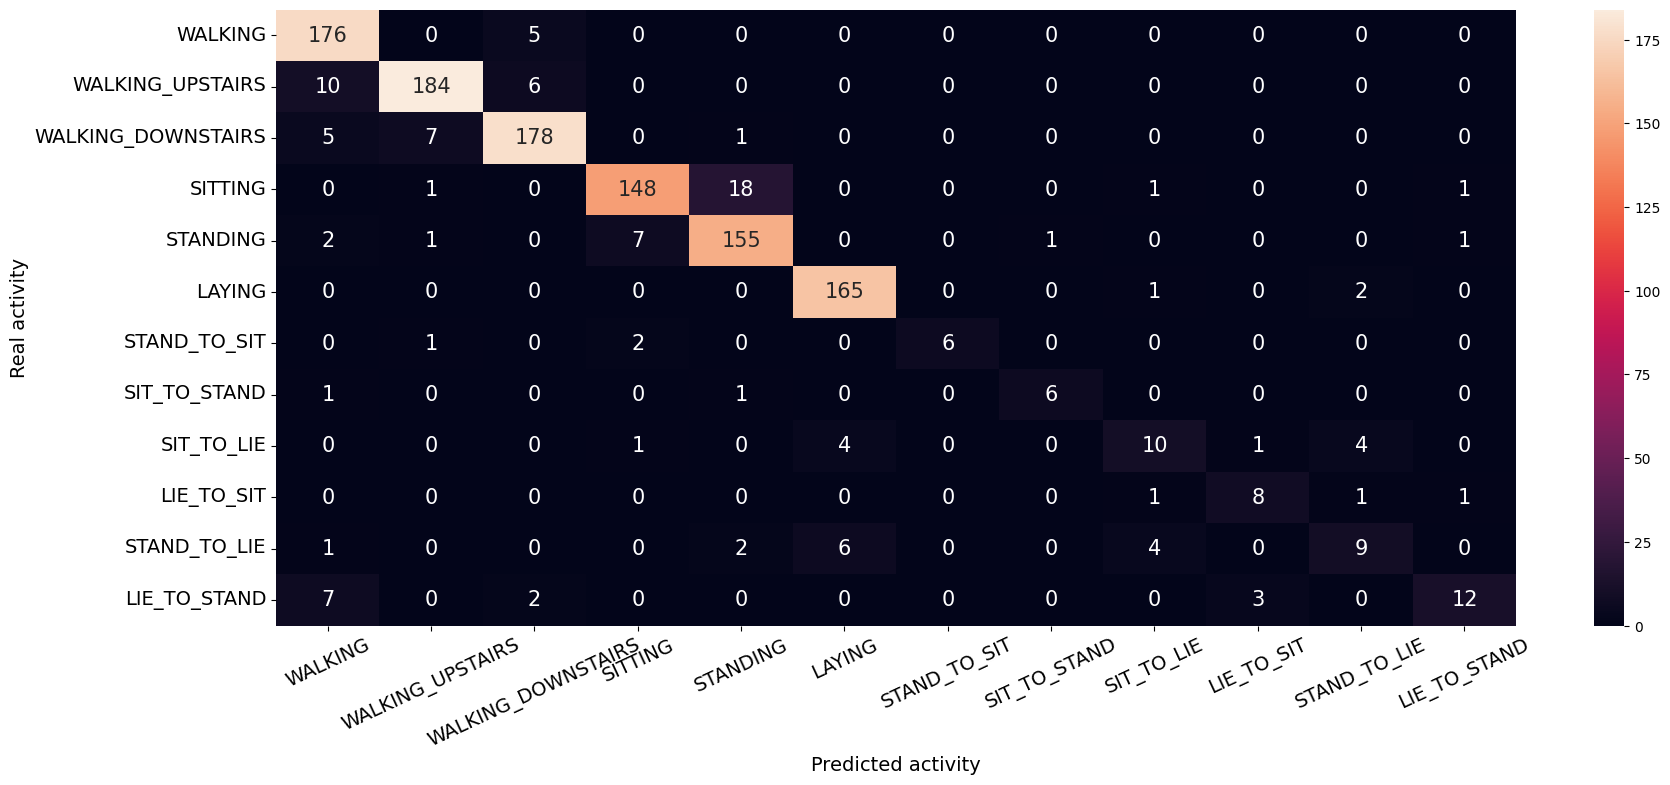

In [111]:
%matplotlib inline
# used modules
import seaborn as sbn

# define the function
def plotConfusionMatrix(yPre):
    convMatrix = confusion_matrix(yTest["actId"], yPre).astype("int")
    plt.figure(figsize=(20,8))
    sbn.heatmap(convMatrix, annot=True, annot_kws={"size": 15}, fmt=".3g")
    #activityNames = ["UNKNOWN","WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
    activityNames = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
    """plt.xticks(np.arange(13)+0.5,activityNames,rotation=20)
    plt.yticks(np.arange(13)+0.5,activityNames,rotation=0)"""
    plt.xticks(np.arange(12)+0.5,activityNames,rotation=25,fontsize=14)
    plt.yticks(np.arange(12)+0.5,activityNames,rotation=0,fontsize=14)
    plt.xlabel("Predicted activity", fontsize=14)
    plt.ylabel("Real activity", fontsize=14)
    plt.show
plotConfusionMatrix(yPre)

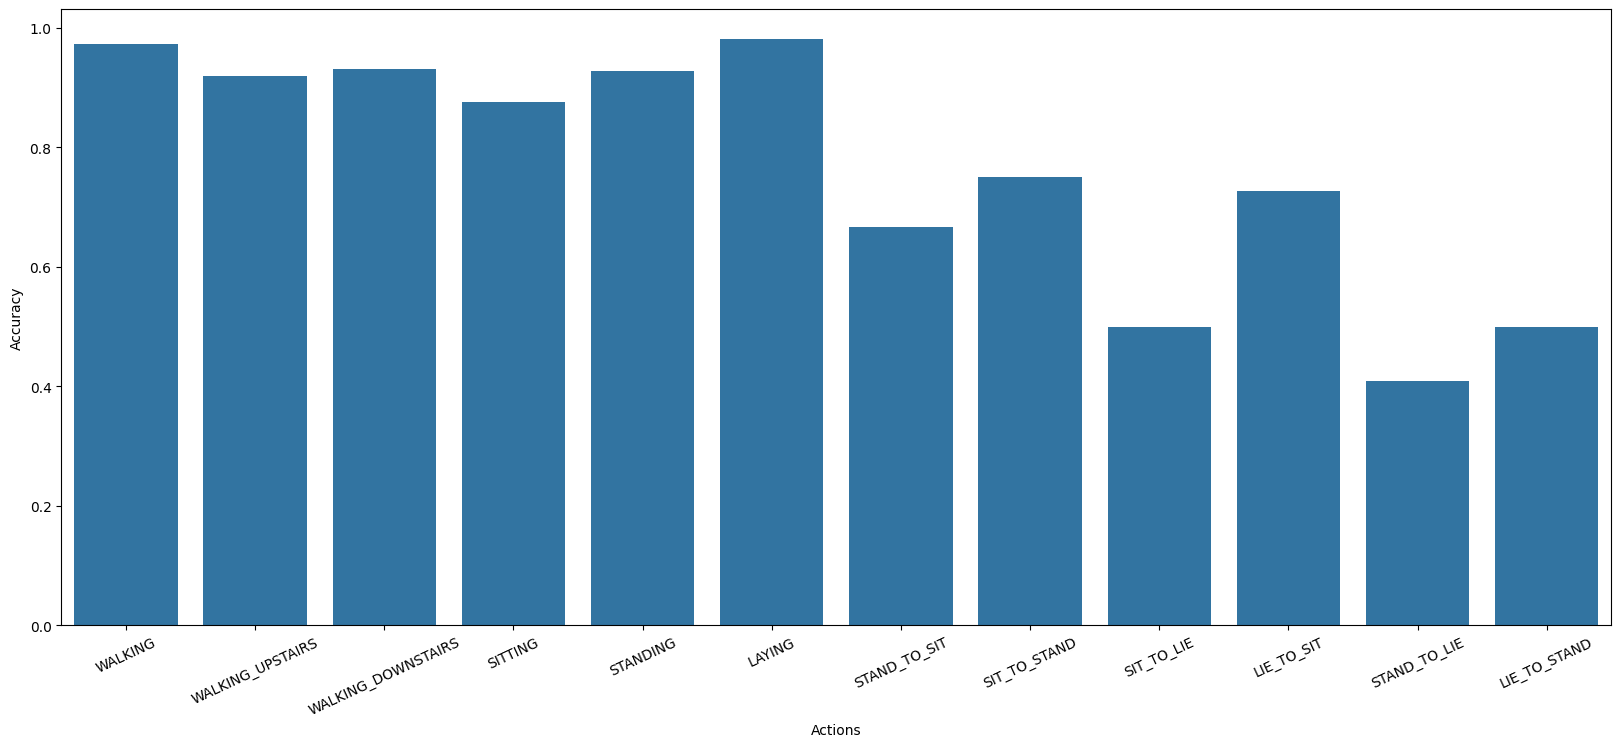

In [112]:
def plotClassAcc(yPre):
    convMatrix = confusion_matrix(yTest["actId"], yPre).astype("int")
    dfActAcc = pd.DataFrame(columns=["Action","Accuracy"])
    activityNames = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
    for i in range(len(convMatrix)):
        act = convMatrix[i]
        actSum = 0
        for j in range(len(act)):
            actSum += act[j]
        dfActAcc.loc[len(dfActAcc)] = [activityNames[i], act[i] / actSum]
    plt.figure(figsize=(20,8))
    sbn.barplot(x=dfActAcc["Action"], y=dfActAcc["Accuracy"])
    plt.xticks(rotation=25)
    plt.xlabel("Actions")
    plt.ylabel("Accuracy")
    plt.show
plotClassAcc(yPre)

In [113]:
print("Classification Report:\n", classification_report(yTest["actId"], yPre))

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.97      0.92       181
           2       0.95      0.92      0.93       200
           3       0.93      0.93      0.93       191
           4       0.94      0.88      0.91       169
           5       0.88      0.93      0.90       167
           6       0.94      0.98      0.96       168
           7       1.00      0.67      0.80         9
           8       0.86      0.75      0.80         8
           9       0.59      0.50      0.54        20
          10       0.67      0.73      0.70        11
          11       0.56      0.41      0.47        22
          12       0.80      0.50      0.62        24

    accuracy                           0.90      1170
   macro avg       0.83      0.76      0.79      1170
weighted avg       0.90      0.90      0.90      1170



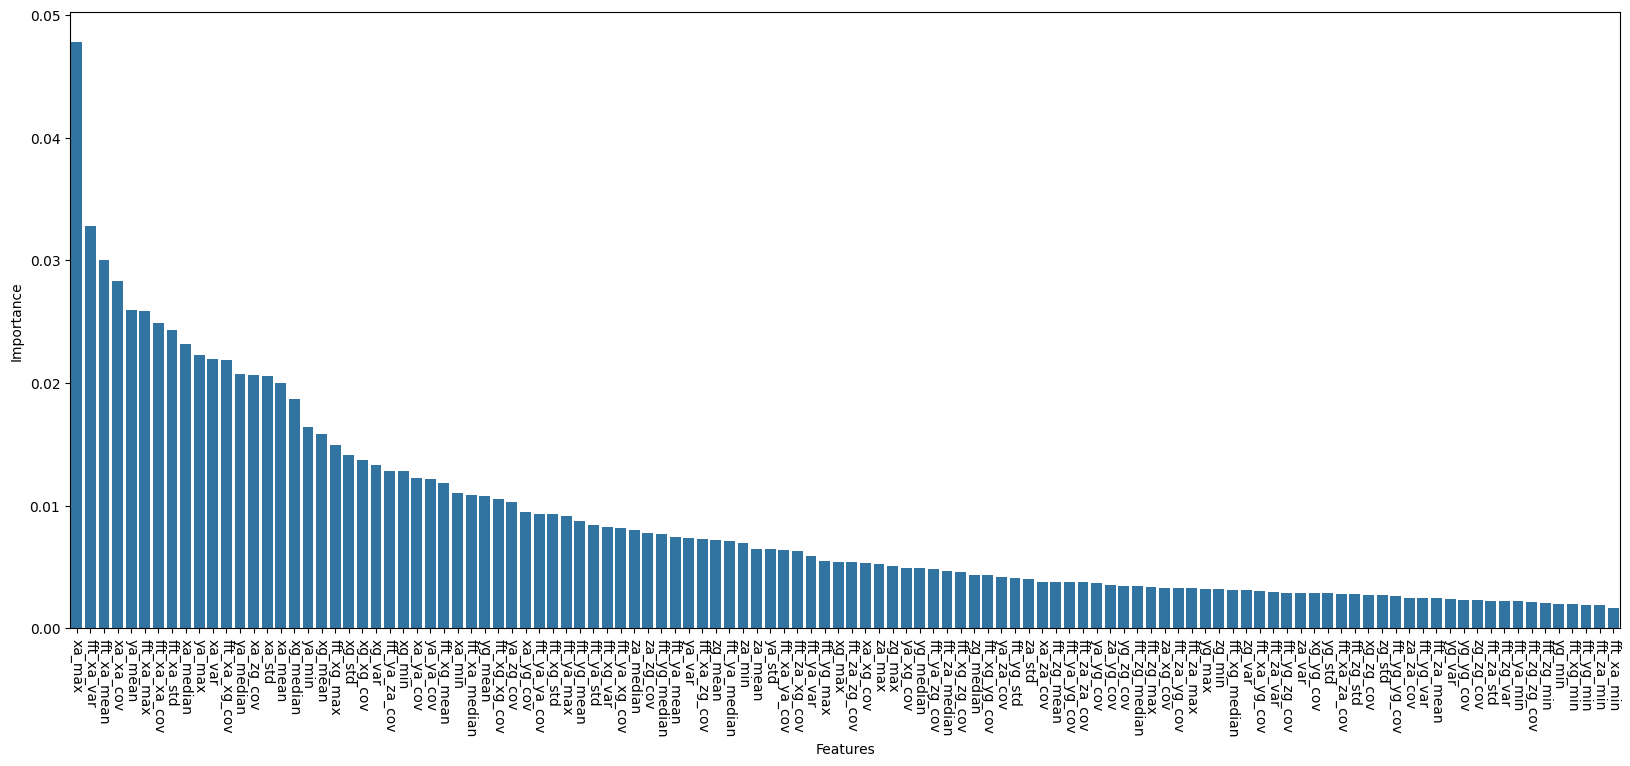

In [114]:
%matplotlib inline

# Extract feature importances
featureImp = rfc.feature_importances_

# define function to plot model feature importance
def plotFeatureImportance(featureImp):
    dfFeatureImp = pd.DataFrame(columns=["Features","Importance"])
    for i in np.argsort(featureImp)[::-1]:
        dfFeatureImp.loc[len(dfFeatureImp)] = [pd.read_csv("x_full.csv").columns[i], featureImp[i]]
    """for i in range(10):
        print(dfFeatureImp["Features"][i], dfFeatureImp["Importance"][i])"""
    plt.figure(figsize=(20,8))
    sbn.barplot(x=dfFeatureImp["Features"], y=dfFeatureImp["Importance"])
    plt.xticks(rotation=270)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show
plotFeatureImportance(featureImp)

After computing the importance of each feature to the entire model the following code block is used to calculate each features importance to each class.

In [115]:
# used modules
import numpy as np
from treeinterpreter import treeinterpreter as ti

def calcClassFeatureImportance():
    #dfClassFeatImp = pd.DataFrame(columns=[x for x in range(13)])
    dfClassFeatImp = pd.DataFrame(columns=[x for x in range(12)])
    yPre, preBias, preCont = ti.predict(rfc, xTestS)
    for feature in range(len(pd.read_csv("x_full.csv").columns)):
        listFeatImp = []
        for activity in set(yTrainR):
            contSum = 0.0
            for window in preCont:
                contSum += window[feature][activity - 1]
            listFeatImp.append(contSum)
        dfClassFeatImp.loc[len(dfClassFeatImp)] = listFeatImp
    dfClassFeatImp["Features"] = pd.read_csv("x_full.csv").columns
    return dfClassFeatImp
calcClassFeatureImportance()

,0,1,2,3,4,5,6,7,8,9,10,11,Features
0,0.223961,-0.400265,-0.139005,0.219026,0.036343,-0.006850,-0.007853,0.010491,0.058189,0.000607,0.139292,-0.133936,xa_mean
1,0.163933,-0.359574,0.047162,1.632785,-1.666823,0.281287,-0.040030,-0.015415,0.053306,-0.076739,0.032631,-0.052523,ya_mean
2,-0.106147,-0.168132,0.151432,0.529550,-0.625723,0.091876,0.033372,0.049277,-0.037780,0.017631,0.045300,0.019344,za_mean
3,0.504309,-0.881824,0.428637,0.016042,0.006910,-0.033189,-0.021644,0.104127,0.107102,-0.241152,0.099908,-0.089226,xg_mean
4,0.006089,-0.437551,0.468068,0.010838,0.011670,0.014285,0.035634,-0.008193,-0.004536,-0.060232,-0.036572,0.000500,yg_mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.025974,0.077284,-0.010554,0.066691,-0.027865,-0.003201,-0.011903,-0.041183,-0.006273,0.069580,-0.011606,-0.074996,fft_ya_min
110,0.081579,0.009856,0.000215,-0.068441,0.109739,0.004741,-0.051792,-0.003981,-0.064973,-0.029320,-0.007956,0.020334,fft_za_min
111,-0.118722,0.062680,0.163538,-0.116158,-0.013441,0.026300,-0.023344,0.008625,-0.000032,0.011701,-0.027030,0.025884,fft_xg_min
112,-0.136379,0.055552,0.106936,-0.087401,0.040130,-0.020507,0.017327,-0.012964,-0.027188,-0.068019,0.099524,0.032988,fft_yg_min


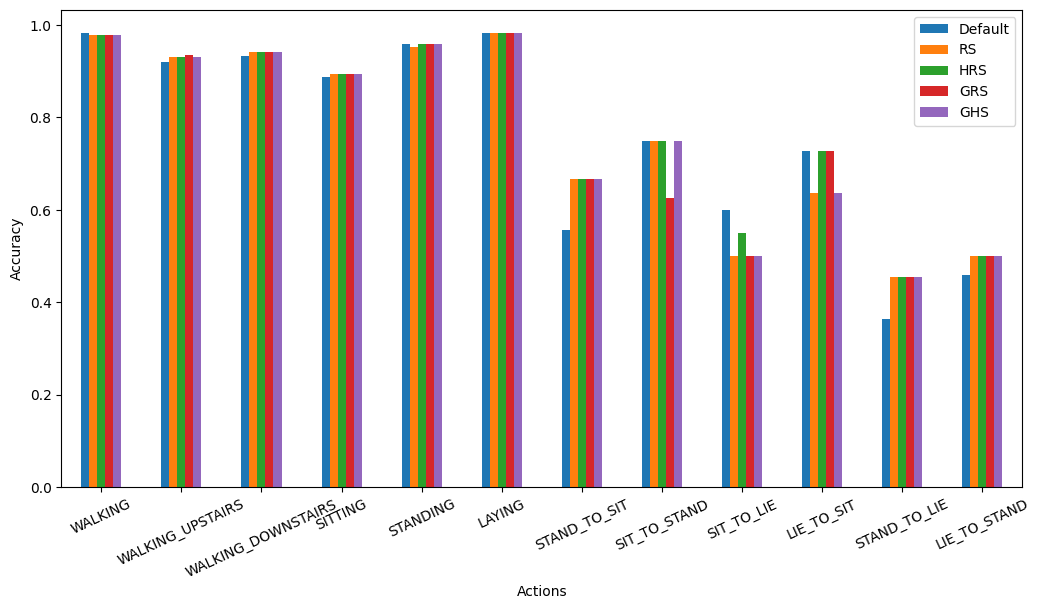

In [116]:
def plotCAComp():
    activityNames = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
    rfc = RandomForestClassifier(random_state=rndSeed)
    rfc.fit(xTrainS, yTrainR)
    yPre = rfc.predict(xTestS)
    cMD = confusion_matrix(yTest["actId"], yPre).astype("int")
    rfc = RandomForestClassifier(random_state=rndSeed, n_estimators=1733, max_depth=100, min_samples_leaf=2, min_samples_split=2, bootstrap=False)
    rfc.fit(xTrainS, yTrainR)
    yPre = rfc.predict(xTestS)
    cMRS = confusion_matrix(yTest["actId"], yPre).astype("int")
    rfc = RandomForestClassifier(random_state=rndSeed, n_estimators=4455, max_depth=50, min_samples_leaf=2, min_samples_split=5, bootstrap=False)
    rfc.fit(xTrainS, yTrainR)
    yPre = rfc.predict(xTestS)
    cMHRS = confusion_matrix(yTest["actId"], yPre).astype("int")
    rfc = RandomForestClassifier(random_state=rndSeed, n_estimators=1733, max_depth=103, min_samples_leaf=1, min_samples_split=2, bootstrap=False)
    rfc.fit(xTrainS, yTrainR)
    yPre = rfc.predict(xTestS)
    cMGRS = confusion_matrix(yTest["actId"], yPre).astype("int")
    rfc = RandomForestClassifier(random_state=rndSeed, n_estimators=4455, max_depth=53, min_samples_leaf=1, min_samples_split=3, bootstrap=False)
    rfc.fit(xTrainS, yTrainR)
    yPre = rfc.predict(xTestS)
    cMGHS = confusion_matrix(yTest["actId"], yPre).astype("int")
    dfActAcc = pd.DataFrame(columns=["Action","Default","RS","HRS","GRS","GHS"])
    for i in range(len(cMD)):
        dfActAcc.loc[len(dfActAcc)] = [activityNames[i], cMD[i][i] / sum(cMD[i]), cMRS[i][i] / sum(cMRS[i]), cMHRS[i][i] / sum(cMHRS[i]), cMGRS[i][i] / sum(cMGRS[i]), cMGHS[i][i] / sum(cMGHS[i])]
    fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True)
    fig.set_size_inches(12.4, 6.2)
    dfActAcc.plot(ax=axs, kind="bar", x="Action", y=["Default","RS","HRS","GRS","GHS"])
    plt.xticks(rotation=25)
    plt.xlabel("Actions")
    plt.ylabel("Accuracy")
    plt.show
plotCAComp()

## Random Search
After running the random forest algorithm for the first time a random search can be used to fine tune its parameters.
For this purpose the options in the search grid below are considered.

In [117]:
# used modules
import numpy as np

numEst = np.linspace(100,5000,int((5000-100)/500)+1,dtype=int)
maxDep = [5,10,15]
minSamSpl = [2,3,5,8,13]
minSamLea = [1,2,3,4,5]
bootstrap = [True, False]

rndGrid = {
    'n_estimators': numEst,
    'max_depth': maxDep,
    'min_samples_split': minSamSpl,
    'min_samples_leaf': minSamLea,
    'bootstrap': bootstrap
}

Then the random search is started and the best parameter set is returned.

In [118]:
# used modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=rndSeed)
rs = RandomizedSearchCV(estimator=rfc, param_distributions=rndGrid, n_iter=20, cv=5, random_state=rndSeed, n_jobs=5)
rs.fit(xTrainS,yTrainR)
rs.best_params_

KeyboardInterrupt: 

And its training and test scores are displayed

In [ ]:
print("Training score:", rs.score(xTrainS, yTrain))
print("Test score:", rs.score(xTestS, yTest))

Training score: 0.9991445680068435
Test score: 0.9136752136752136


In [ ]:
rfc = RandomForestClassifier(
    n_estimators=rs.best_params_["n_estimators"],
    min_samples_split=rs.best_params_["min_samples_split"],
    min_samples_leaf=rs.best_params_["min_samples_leaf"],
    bootstrap=rs.best_params_["bootstrap"],
    random_state=rndSeed
)
rfc.fit(xTrainS,yTrainR)
yPre = rfc.predict(xTestS)
plotConfusionMatrix(yPre)

KeyboardInterrupt: 

In [ ]:
print("Classification Report:\n", classification_report(yTest["actId"], yPre))

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       181
           2       0.95      0.93      0.94       200
           3       0.94      0.94      0.94       191
           4       0.93      0.89      0.91       169
           5       0.88      0.95      0.92       167
           6       0.96      0.98      0.97       168
           7       0.86      0.67      0.75         9
           8       0.83      0.62      0.71         8
           9       0.67      0.50      0.57        20
          10       0.73      0.73      0.73        11
          11       0.48      0.45      0.47        22
          12       0.80      0.50      0.62        24

    accuracy                           0.91      1170
   macro avg       0.83      0.76      0.79      1170
weighted avg       0.91      0.91      0.91      1170



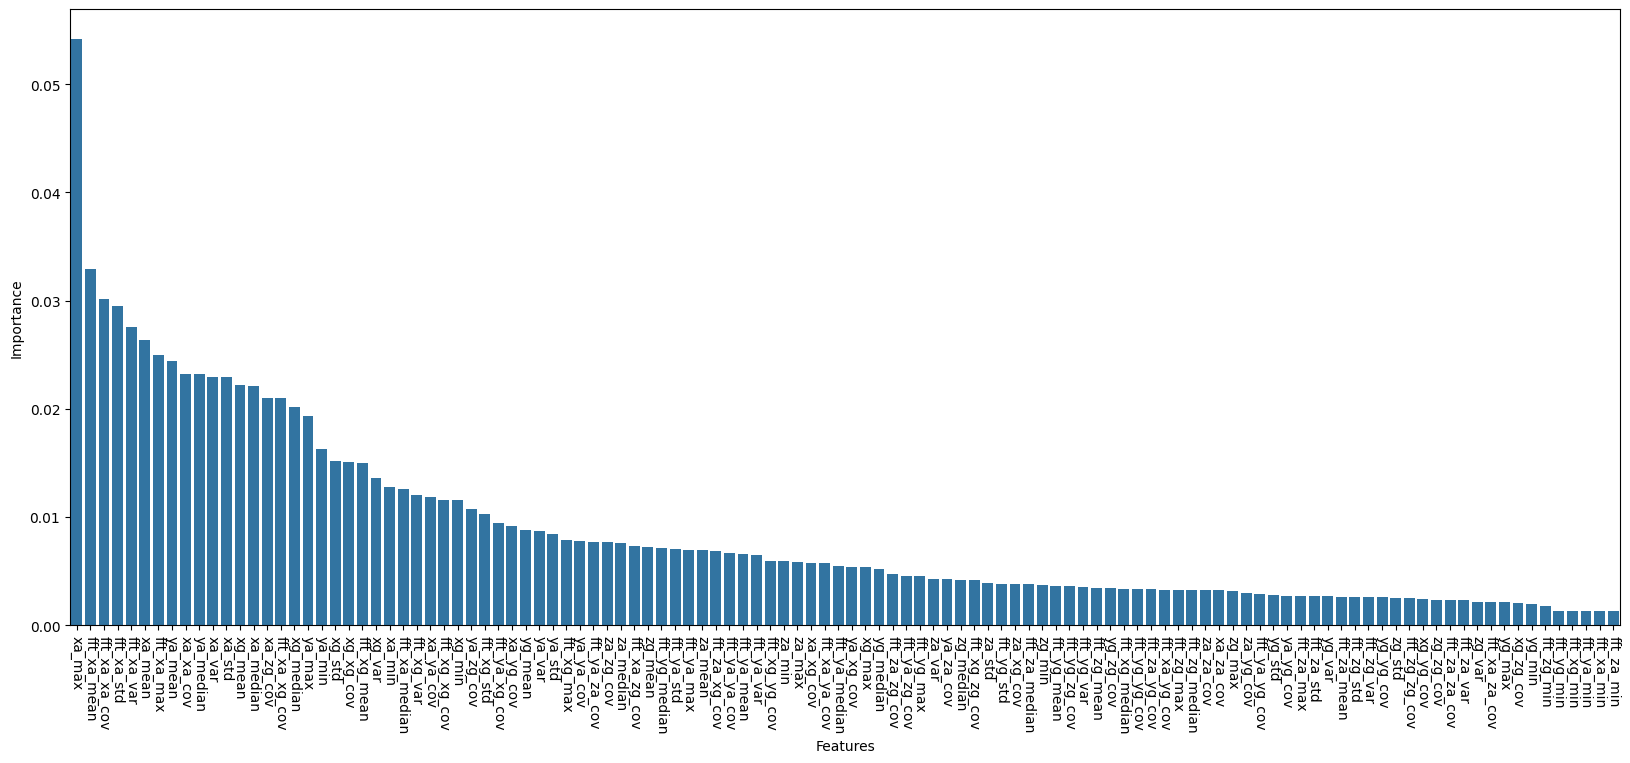

In [ ]:
# Extract feature importances
featureImp = rfc.feature_importances_
plotFeatureImportance(featureImp)

In [ ]:
calcClassFeatureImportance()

,0,1,2,3,4,5,6,7,8,9,10,11,Features
0,-0.019237,-0.242504,-0.132292,-0.066844,-0.086010,0.399704,-0.047339,-0.009790,0.066022,0.024153,0.101379,0.012758,xa_mean
1,0.169213,-0.286316,0.044811,1.558867,-1.532189,0.147660,-0.081132,-0.059826,0.073387,-0.028568,0.047936,-0.053844,ya_mean
2,0.104930,0.040516,0.004668,0.657644,-0.830254,0.156010,-0.016248,-0.012593,-0.021468,-0.015148,-0.038134,-0.029923,za_mean
3,0.684528,-1.754755,1.144271,0.064632,-0.040217,-0.045629,0.018731,0.050349,0.218875,-0.198140,-0.000175,-0.142471,xg_mean
4,-0.101684,-0.348992,0.500137,0.020799,-0.111344,0.036000,0.012618,0.017886,0.008082,-0.013756,-0.037093,0.017346,yg_mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.033562,0.032606,0.000016,0.003830,0.027200,-0.004637,0.005675,-0.025541,-0.041178,0.012721,0.024635,-0.001764,fft_ya_min
110,0.064295,-0.055857,0.006231,-0.020747,0.029571,-0.011345,-0.000579,-0.000559,-0.007984,-0.006727,-0.008313,0.012015,fft_za_min
111,-0.044764,-0.008489,0.033738,-0.090152,0.075961,0.003059,0.003114,0.011384,0.018750,-0.008836,0.009465,-0.003230,fft_xg_min
112,-0.040897,0.067390,-0.025528,0.013483,-0.040354,-0.017830,0.006084,0.024751,0.015901,-0.040568,0.004264,0.033305,fft_yg_min


## Halving random search
An alternative to the random search is the halving random, which starts with all candidates and iteratively continues with the best ones until only one remains.

In [ ]:
# used modules
import numpy as np

numEst = np.linspace(100,5000,int((5000-100)/500)+1,dtype=int)
maxDep = [5,10,15]
minSamSpl = [2,3,5,8,13]
minSamLea = [1,2,3,4,5]
bootstrap = [True, False]

rndGrid = {
    'n_estimators': numEst,
    'max_depth': maxDep,
    'min_samples_split': minSamSpl,
    'min_samples_leaf': minSamLea,
    'bootstrap': bootstrap
}

In [ ]:
# used modules
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

rfc = RandomForestClassifier(random_state=rndSeed)
hrs = HalvingRandomSearchCV(estimator=rfc, param_distributions=rndGrid, cv=5, random_state=rndSeed, n_jobs=5)
hrs.fit(xTrainS,yTrainR)
hrs.best_params_

/Users/lucas/Desktop/ComTec1/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': np.int64(4455),
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': False}

In [ ]:
print("Training score:", hrs.score(xTrainS, yTrain))
print("Test score:", hrs.score(xTestS, yTest))

Training score: 0.9997148560022812
Test score: 0.9136752136752136


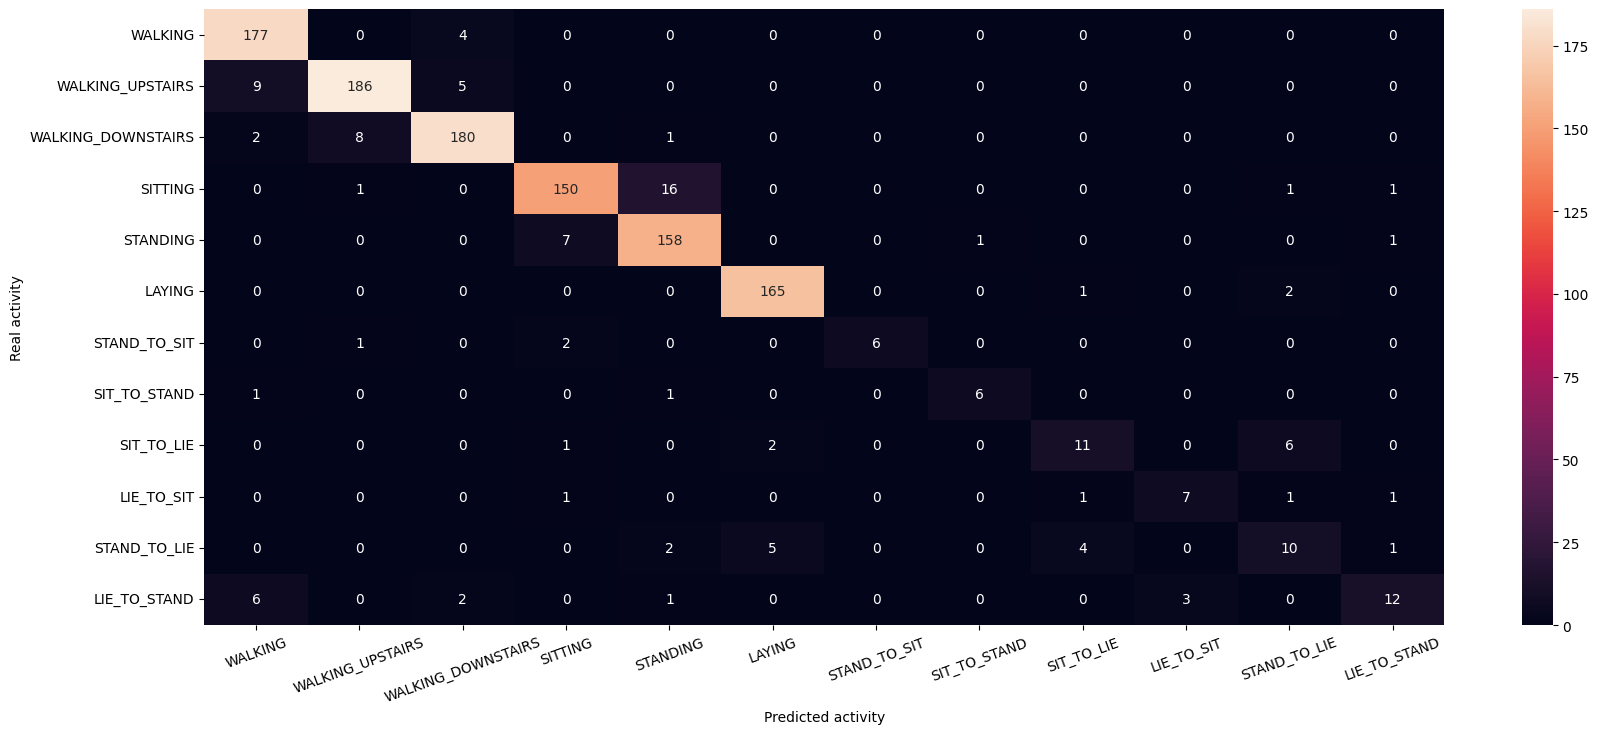

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=hrs.best_params_["n_estimators"],
    min_samples_split=hrs.best_params_["min_samples_split"],
    min_samples_leaf=hrs.best_params_["min_samples_leaf"],
    bootstrap=hrs.best_params_["bootstrap"],
    random_state=rndSeed
)
rfc.fit(xTrainS,yTrainR)
yPre = rfc.predict(xTestS)
plotConfusionMatrix(yPre)

In [ ]:
print("Classification Report:\n", classification_report(yTest["actId"], yPre))

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       181
           2       0.95      0.93      0.94       200
           3       0.94      0.94      0.94       191
           4       0.93      0.89      0.91       169
           5       0.88      0.95      0.91       167
           6       0.96      0.98      0.97       168
           7       1.00      0.67      0.80         9
           8       0.86      0.75      0.80         8
           9       0.65      0.55      0.59        20
          10       0.70      0.64      0.67        11
          11       0.50      0.45      0.48        22
          12       0.75      0.50      0.60        24

    accuracy                           0.91      1170
   macro avg       0.84      0.77      0.80      1170
weighted avg       0.91      0.91      0.91      1170



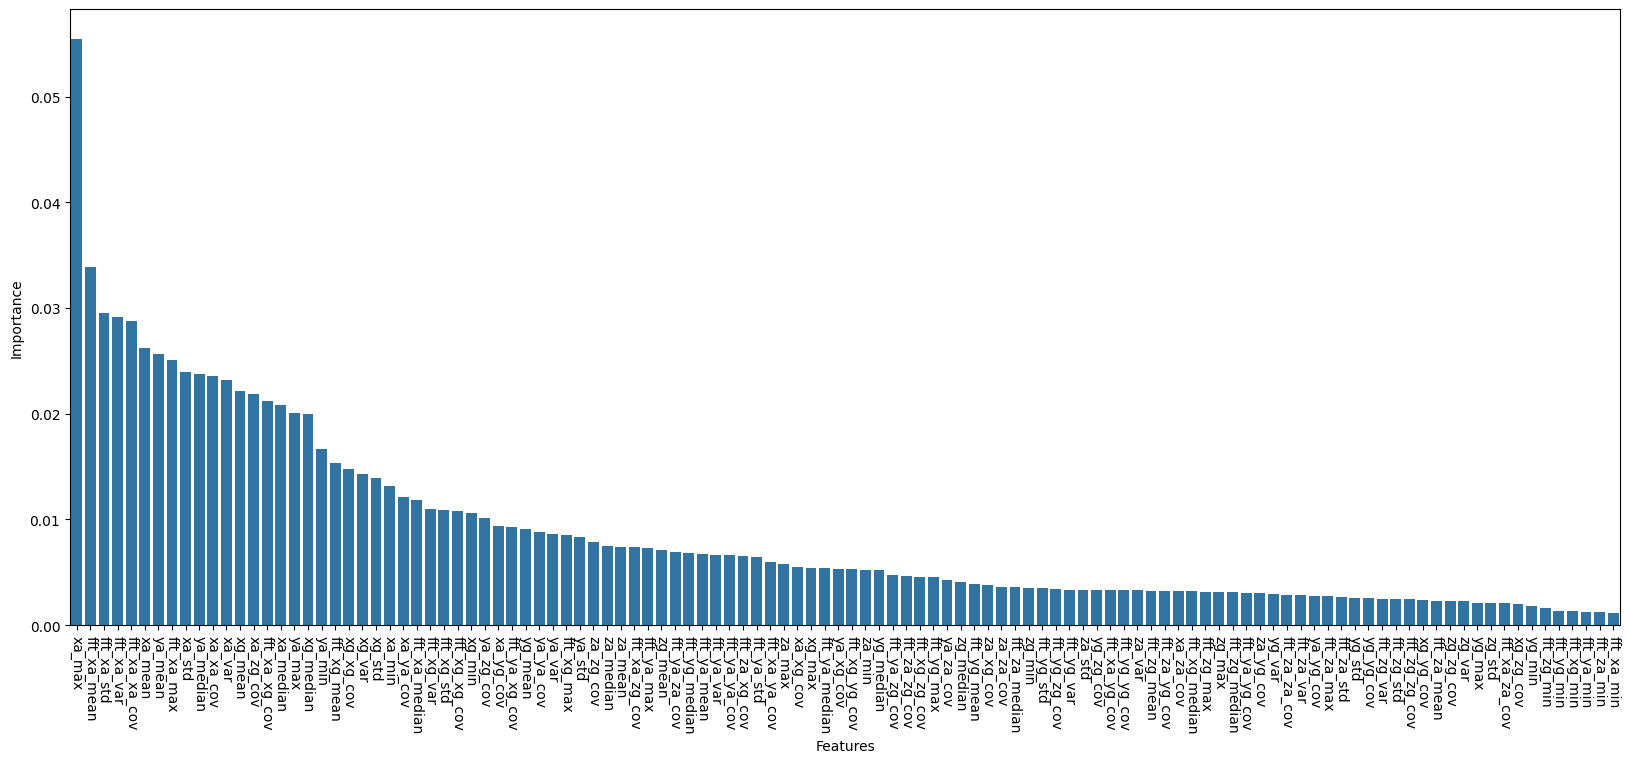

In [ ]:
# Extract feature importances
featureImp = rfc.feature_importances_
plotFeatureImportance(featureImp)

In [ ]:
calcClassFeatureImportance()

,0,1,2,3,4,5,6,7,8,9,10,11,Features
0,-0.018582,-0.246006,-0.115578,-0.049612,-0.076356,0.365587,-0.041499,-0.013454,0.073966,0.025185,0.094040,0.002308,xa_mean
1,0.136403,-0.242324,0.050918,1.606021,-1.591680,0.156687,-0.070974,-0.058200,0.041730,-0.007450,0.036202,-0.057332,ya_mean
2,0.099976,0.094823,0.014111,0.768225,-0.935584,0.144368,-0.019252,-0.021780,-0.043097,-0.030439,-0.046534,-0.024817,za_mean
3,0.589553,-1.671502,1.185993,0.077446,-0.073040,-0.051061,0.021022,0.041042,0.235438,-0.205209,-0.005770,-0.143912,xg_mean
4,-0.185923,-0.314628,0.529744,0.030693,-0.094699,0.025878,0.020068,0.006521,0.011637,-0.009749,-0.031819,0.012278,yg_mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.024407,0.026273,0.002982,-0.030229,0.057247,-0.008658,-0.004224,-0.015529,-0.030072,0.019386,0.024984,-0.017755,fft_ya_min
110,0.034552,-0.041460,0.007704,-0.024359,0.032593,-0.015346,0.002244,-0.005692,-0.004170,-0.004358,0.011647,0.006646,fft_za_min
111,-0.050048,-0.008024,0.039494,-0.079744,0.075287,0.003945,0.005923,0.002685,0.011833,-0.004483,0.009609,-0.006477,fft_xg_min
112,-0.042882,0.089568,-0.041121,0.013979,-0.059610,-0.010458,0.007249,0.029808,0.018888,-0.047848,0.004600,0.037826,fft_yg_min


## Grid Search
After the random search methods conclude and return a set of parameters two grid searches are started to explore the areas around the results of the random search algorithms.

In [ ]:
numEst = [rs.best_params_["n_estimators"] + x * 125 for x in range(-2,2)]
maxDep = [rs.best_params_["max_depth"] + x for x in range(-2,2)]
minSamSpl = [max(rs.best_params_["min_samples_split"] + x, 2) for x in range(-2,2)]
minSamLea = [max(rs.best_params_["min_samples_leaf"] + x, 1) for x in range(-1,1)]

searchGrid = {
    'n_estimators': numEst,
    'max_depth': maxDep,
    'min_samples_split': minSamSpl,
    'min_samples_leaf': minSamLea
}

In [ ]:
# used modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(
    bootstrap=rs.best_params_["bootstrap"],
    random_state=rndSeed
)
gs1 = GridSearchCV(estimator=rfc, param_grid=searchGrid, cv=5, n_jobs=5)
gs1.fit(xTrainS,yTrainR)
gs1.best_params_

{'max_depth': 103,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': np.int64(1733)}

In [ ]:
print("Training score:", gs1.score(xTrainS, yTrain))
print("Test score:", gs1.score(xTestS, yTest))

Training score: 1.0
Test score: 0.9162393162393162


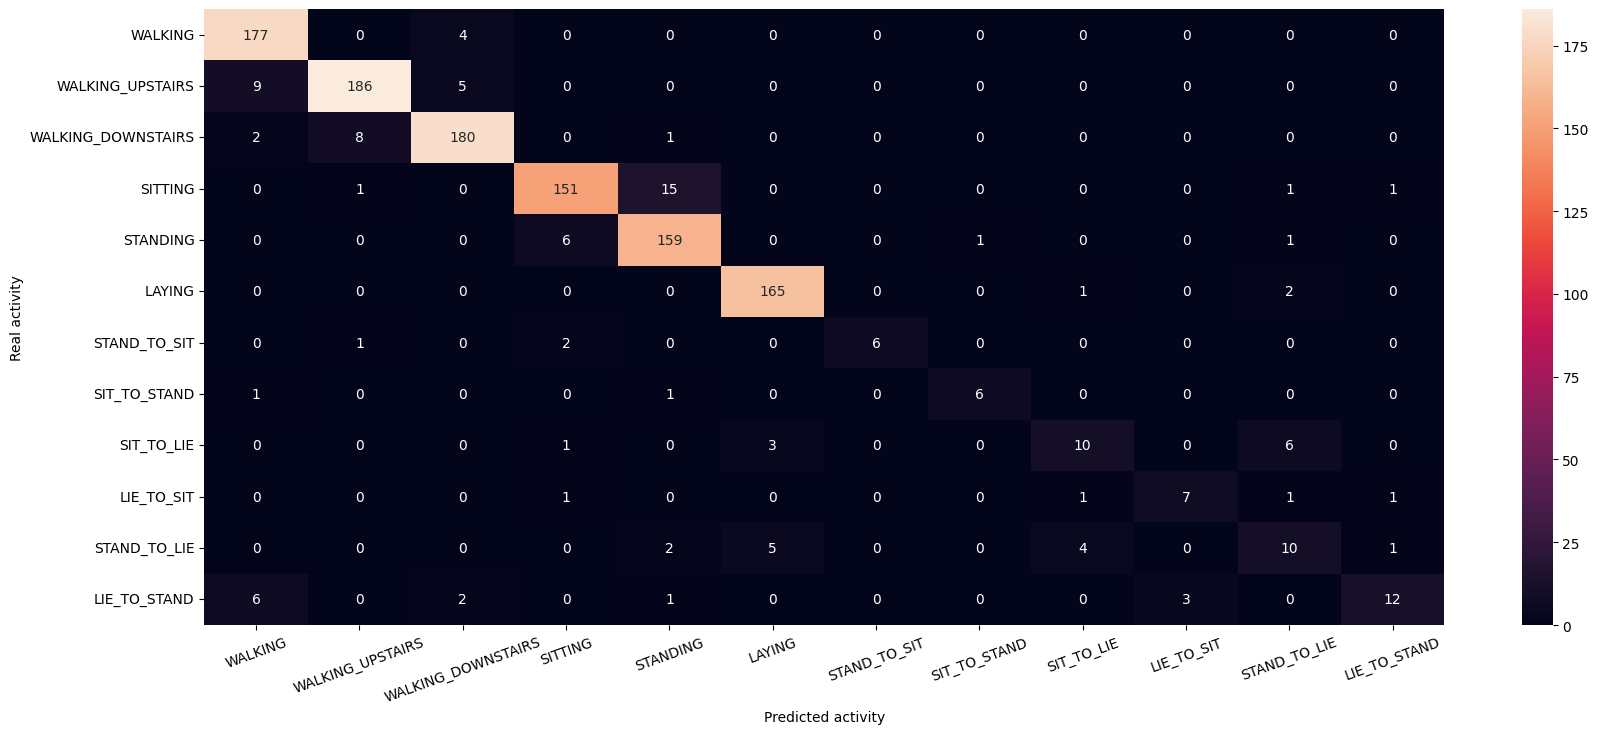

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=gs1.best_params_["n_estimators"],
    min_samples_split=gs1.best_params_["min_samples_split"],
    min_samples_leaf=gs1.best_params_["min_samples_leaf"],
    bootstrap=rs.best_params_["bootstrap"],
    random_state=rndSeed
)
rfc.fit(xTrainS,yTrainR)
yPre = rfc.predict(xTestS)
plotConfusionMatrix(yPre)

In [ ]:
print("Classification Report:\n", classification_report(yTest["actId"], yPre))

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       181
           2       0.95      0.93      0.94       200
           3       0.94      0.94      0.94       191
           4       0.94      0.89      0.92       169
           5       0.89      0.95      0.92       167
           6       0.95      0.98      0.97       168
           7       1.00      0.67      0.80         9
           8       0.86      0.75      0.80         8
           9       0.62      0.50      0.56        20
          10       0.70      0.64      0.67        11
          11       0.48      0.45      0.47        22
          12       0.80      0.50      0.62        24

    accuracy                           0.91      1170
   macro avg       0.84      0.77      0.79      1170
weighted avg       0.91      0.91      0.91      1170



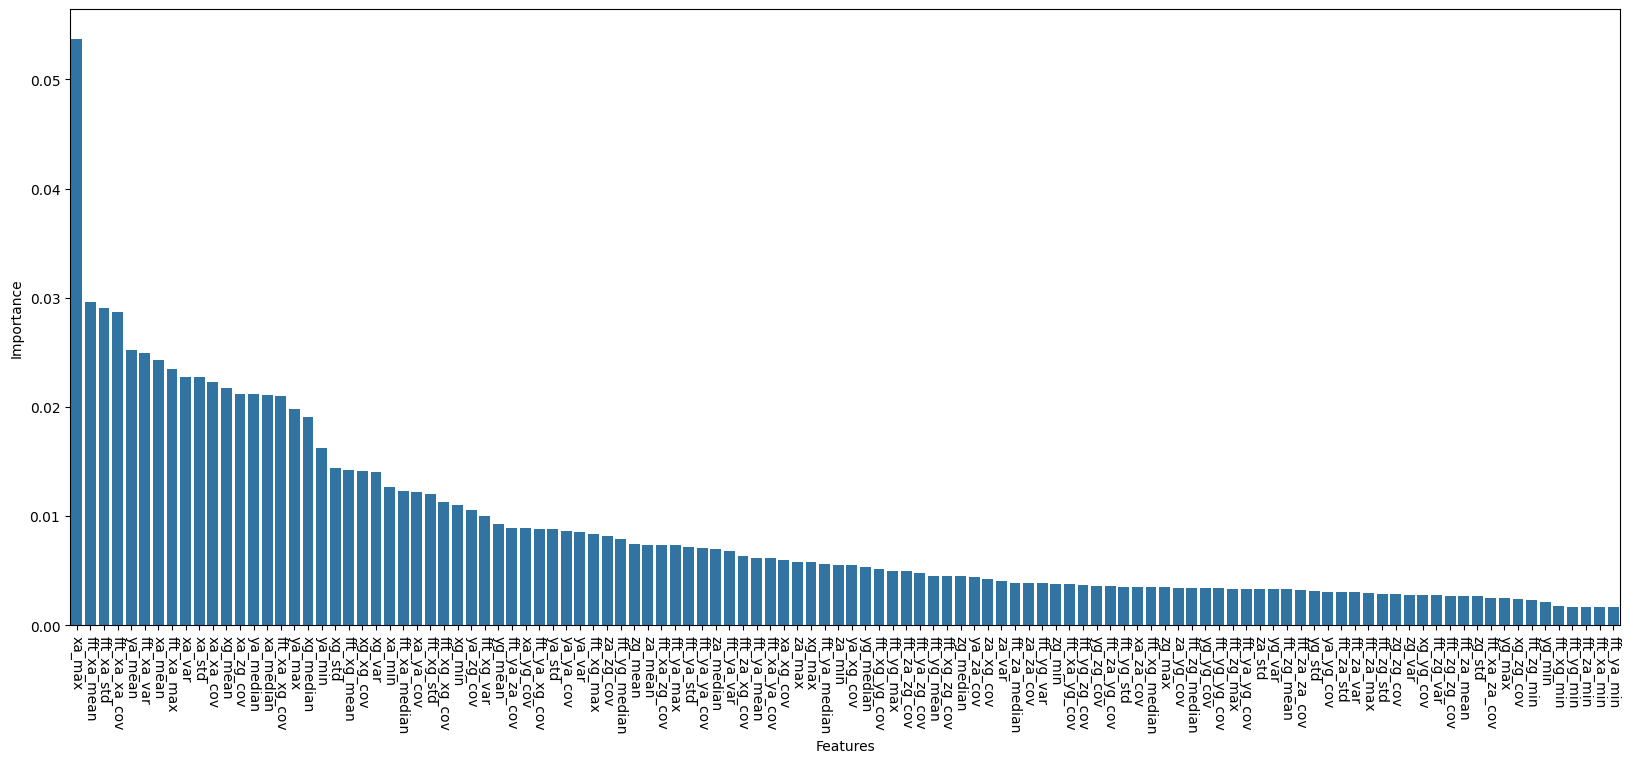

In [ ]:
# Extract feature importances
featureImp = rfc.feature_importances_
plotFeatureImportance(featureImp)

In [ ]:
calcClassFeatureImportance()

,0,1,2,3,4,5,6,7,8,9,10,11,Features
0,-0.001164,-0.212999,-0.114890,0.028186,-0.103834,0.269174,-0.047123,-0.013207,0.071788,0.028899,0.081329,0.013840,xa_mean
1,0.123785,-0.212465,0.057015,1.630770,-1.679237,0.154913,-0.069496,-0.056012,0.077179,-0.012395,0.048557,-0.062614,ya_mean
2,0.151712,0.092183,0.017958,0.731099,-0.906609,0.163601,-0.017040,-0.018538,-0.071083,-0.032937,-0.060904,-0.049444,za_mean
3,0.640775,-1.788499,1.183468,0.073869,-0.050221,-0.046582,0.027962,0.052984,0.267084,-0.213419,-0.016915,-0.130505,xg_mean
4,-0.192775,-0.314037,0.579800,-0.000560,-0.107940,0.019379,0.022310,0.006331,0.013092,-0.013891,-0.032149,0.020439,yg_mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.028263,0.005689,0.023942,-0.009421,0.050472,-0.009058,0.003759,-0.025317,-0.040489,0.024353,0.017045,-0.012713,fft_ya_min
110,0.028712,-0.042663,0.026145,-0.025898,0.014276,-0.007032,0.011308,0.000090,-0.014574,-0.009513,0.008746,0.010404,fft_za_min
111,-0.035076,-0.006563,0.032128,-0.105804,0.077312,-0.007725,0.005601,0.019176,0.028024,-0.012547,0.001976,0.003498,fft_xg_min
112,-0.026621,0.098676,-0.049377,-0.008306,-0.049389,-0.015805,-0.000708,0.048321,0.014562,-0.046583,0.007914,0.027316,fft_yg_min


In [ ]:
numEst = [hrs.best_params_["n_estimators"] + x * 125 for x in range(-2,2)]
maxDep = [hrs.best_params_["max_depth"] + x for x in range(-2,2)]
minSamSpl = [max(hrs.best_params_["min_samples_split"] + x, 2) for x in range(-2,2)]
minSamLea = [max(hrs.best_params_["min_samples_leaf"] + x, 1) for x in range(-1,1)]

searchGrid = {
    'n_estimators': numEst,
    'max_depth': maxDep,
    'min_samples_split': minSamSpl,
    'min_samples_leaf': minSamLea
}

In [ ]:
# used modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(
    bootstrap=hrs.best_params_["bootstrap"],
    random_state=rndSeed
)
gs2 = GridSearchCV(estimator=rfc, param_grid=searchGrid, cv=5, n_jobs=5)
gs2.fit(xTrainS,yTrainR)
gs2.best_params_

/Users/lucas/Desktop/ComTec1/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 53,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': np.int64(4580)}

In [ ]:
print("Training score:", gs2.score(xTrainS, yTrain))
print("Test score:", gs2.score(xTestS, yTest))

Training score: 1.0
Test score: 0.9162393162393162


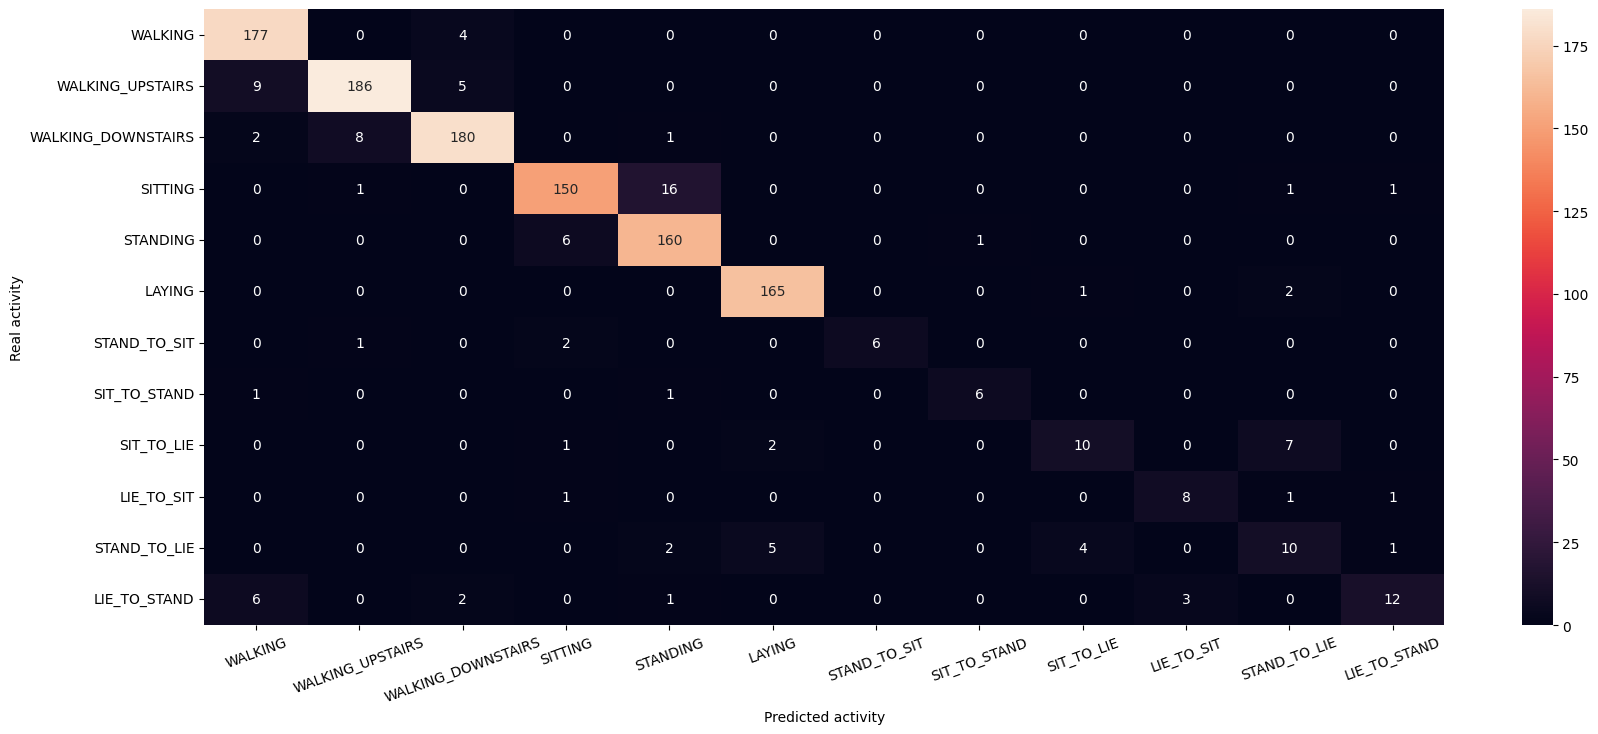

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=gs2.best_params_["n_estimators"],
    min_samples_split=gs2.best_params_["min_samples_split"],
    min_samples_leaf=gs2.best_params_["min_samples_leaf"],
    bootstrap=hrs.best_params_["bootstrap"],
    random_state=rndSeed
)
rfc.fit(xTrainS,yTrainR)
yPre = rfc.predict(xTestS)
plotConfusionMatrix(yPre)

In [ ]:
print("Classification Report:\n", classification_report(yTest["actId"], yPre))

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       181
           2       0.95      0.93      0.94       200
           3       0.94      0.94      0.94       191
           4       0.94      0.89      0.91       169
           5       0.88      0.96      0.92       167
           6       0.96      0.98      0.97       168
           7       1.00      0.67      0.80         9
           8       0.86      0.75      0.80         8
           9       0.67      0.50      0.57        20
          10       0.73      0.73      0.73        11
          11       0.48      0.45      0.47        22
          12       0.80      0.50      0.62        24

    accuracy                           0.91      1170
   macro avg       0.84      0.77      0.80      1170
weighted avg       0.91      0.91      0.91      1170



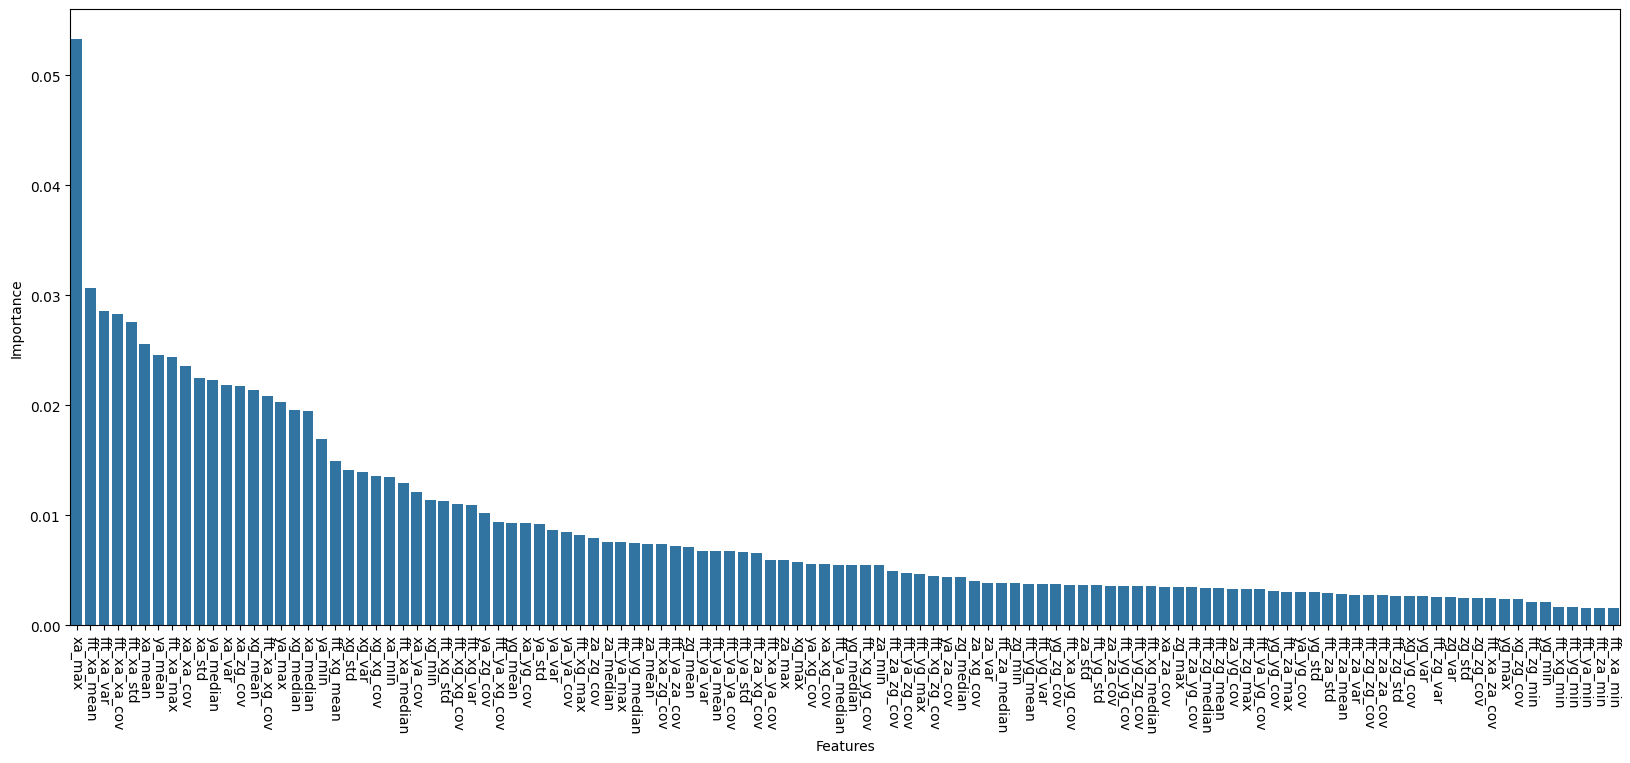

In [ ]:
# Extract feature importances
featureImp = rfc.feature_importances_
plotFeatureImportance(featureImp)

In [ ]:
calcClassFeatureImportance()

,0,1,2,3,4,5,6,7,8,9,10,11,Features
0,0.000281,-0.219384,-0.139076,-0.024002,-0.103689,0.375113,-0.043986,-0.010320,0.072349,0.005127,0.098216,-0.010630,xa_mean
1,0.157244,-0.306505,0.050502,1.568074,-1.573355,0.179547,-0.071136,-0.062152,0.055518,-0.006533,0.043828,-0.035031,ya_mean
2,0.128394,0.081110,-0.024134,0.734986,-0.894795,0.142545,-0.018673,-0.017960,-0.041837,-0.023070,-0.052668,-0.013898,za_mean
3,0.539544,-1.677271,1.257574,0.063782,-0.062091,-0.065947,0.014537,0.048206,0.261601,-0.226985,-0.018346,-0.134604,xg_mean
4,-0.150634,-0.315223,0.502967,0.020781,-0.105738,0.021437,0.015401,0.007877,0.012330,-0.020307,-0.007764,0.018872,yg_mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.039724,0.020874,0.024641,-0.023770,0.057853,-0.008278,-0.010929,-0.023849,-0.035087,0.027271,0.020820,-0.009822,fft_ya_min
110,0.028378,-0.031258,0.009201,-0.025915,0.032964,-0.015944,0.007837,-0.007168,-0.007415,-0.001005,0.008739,0.001585,fft_za_min
111,-0.024727,-0.030812,0.040182,-0.102261,0.087071,-0.009151,0.003936,0.014074,0.015383,-0.007219,-0.000707,0.014232,fft_xg_min
112,-0.034218,0.079057,-0.039423,0.034693,-0.085460,-0.017031,0.006822,0.030661,0.022377,-0.045052,0.001321,0.046254,fft_yg_min
